In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None) # Warnin 방지용
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager, rc

%matplotlib inline
#sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,9)

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
humidity = pd.read_csv('data2/dw_humidity.csv', encoding='ansi')
humidity.head()

,city,district,district_code,humidity_date,avg_humidity,min_humidity,max_humidity
0,부산광역시,강서구,D01,2019-01,40,10,90
1,부산광역시,강서구,D01,2019-02,47,10,90
2,부산광역시,강서구,D01,2019-03,51,15,90
3,부산광역시,강서구,D01,2019-04,61,15,95
4,부산광역시,강서구,D01,2019-05,59,20,95


In [4]:
district = [] # 구
district_code = [] # 구 코드
for c in humidity['district']:
    if c not in district:
        district.append(c)
for d in humidity['district_code']:
    if d not in district_code:
        district_code.append(d)
        
# 월
month = []
for m in humidity['humidity_date']:
    if m not in month:
        month.append(m)
        
# d_avg
avg_humidity = []
for i in range(len(district)):
    d = humidity[humidity.district == district[i]]   
    ds = d['avg_humidity'].sum()
    dss = ds / 12
    avg_humidity.append(dss)
    
# d_min
min_humidity = []
for i in range(len(district)):
    d = humidity[humidity.district == district[i]]
    ds = d['min_humidity'].min()
    min_humidity.append(ds)

# d_max
max_humidity = []
for i in range(len(district)):
    d = humidity[humidity.district == district[i]]
    ds = d['max_humidity'].max()
    max_humidity.append(ds)

    
    
# m_avg
avg_humidity_m = []
for i in range(len(month)):
    d = humidity[humidity.humidity_date == month[i]]   
    ds = d['avg_humidity'].sum()
    dss = ds / 12
    avg_humidity_m.append(dss)
    
# m_min
min_humidity_m = []
for i in range(len(month)):
    d = humidity[humidity.humidity_date == month[i]]
    ds = d['min_humidity'].min()
    min_humidity_m.append(ds)

# m_max
max_humidity_m = []
for i in range(len(month)):
    d = humidity[humidity.humidity_date == month[i]]
    ds = d['max_humidity'].max()
    max_humidity_m.append(ds)
    

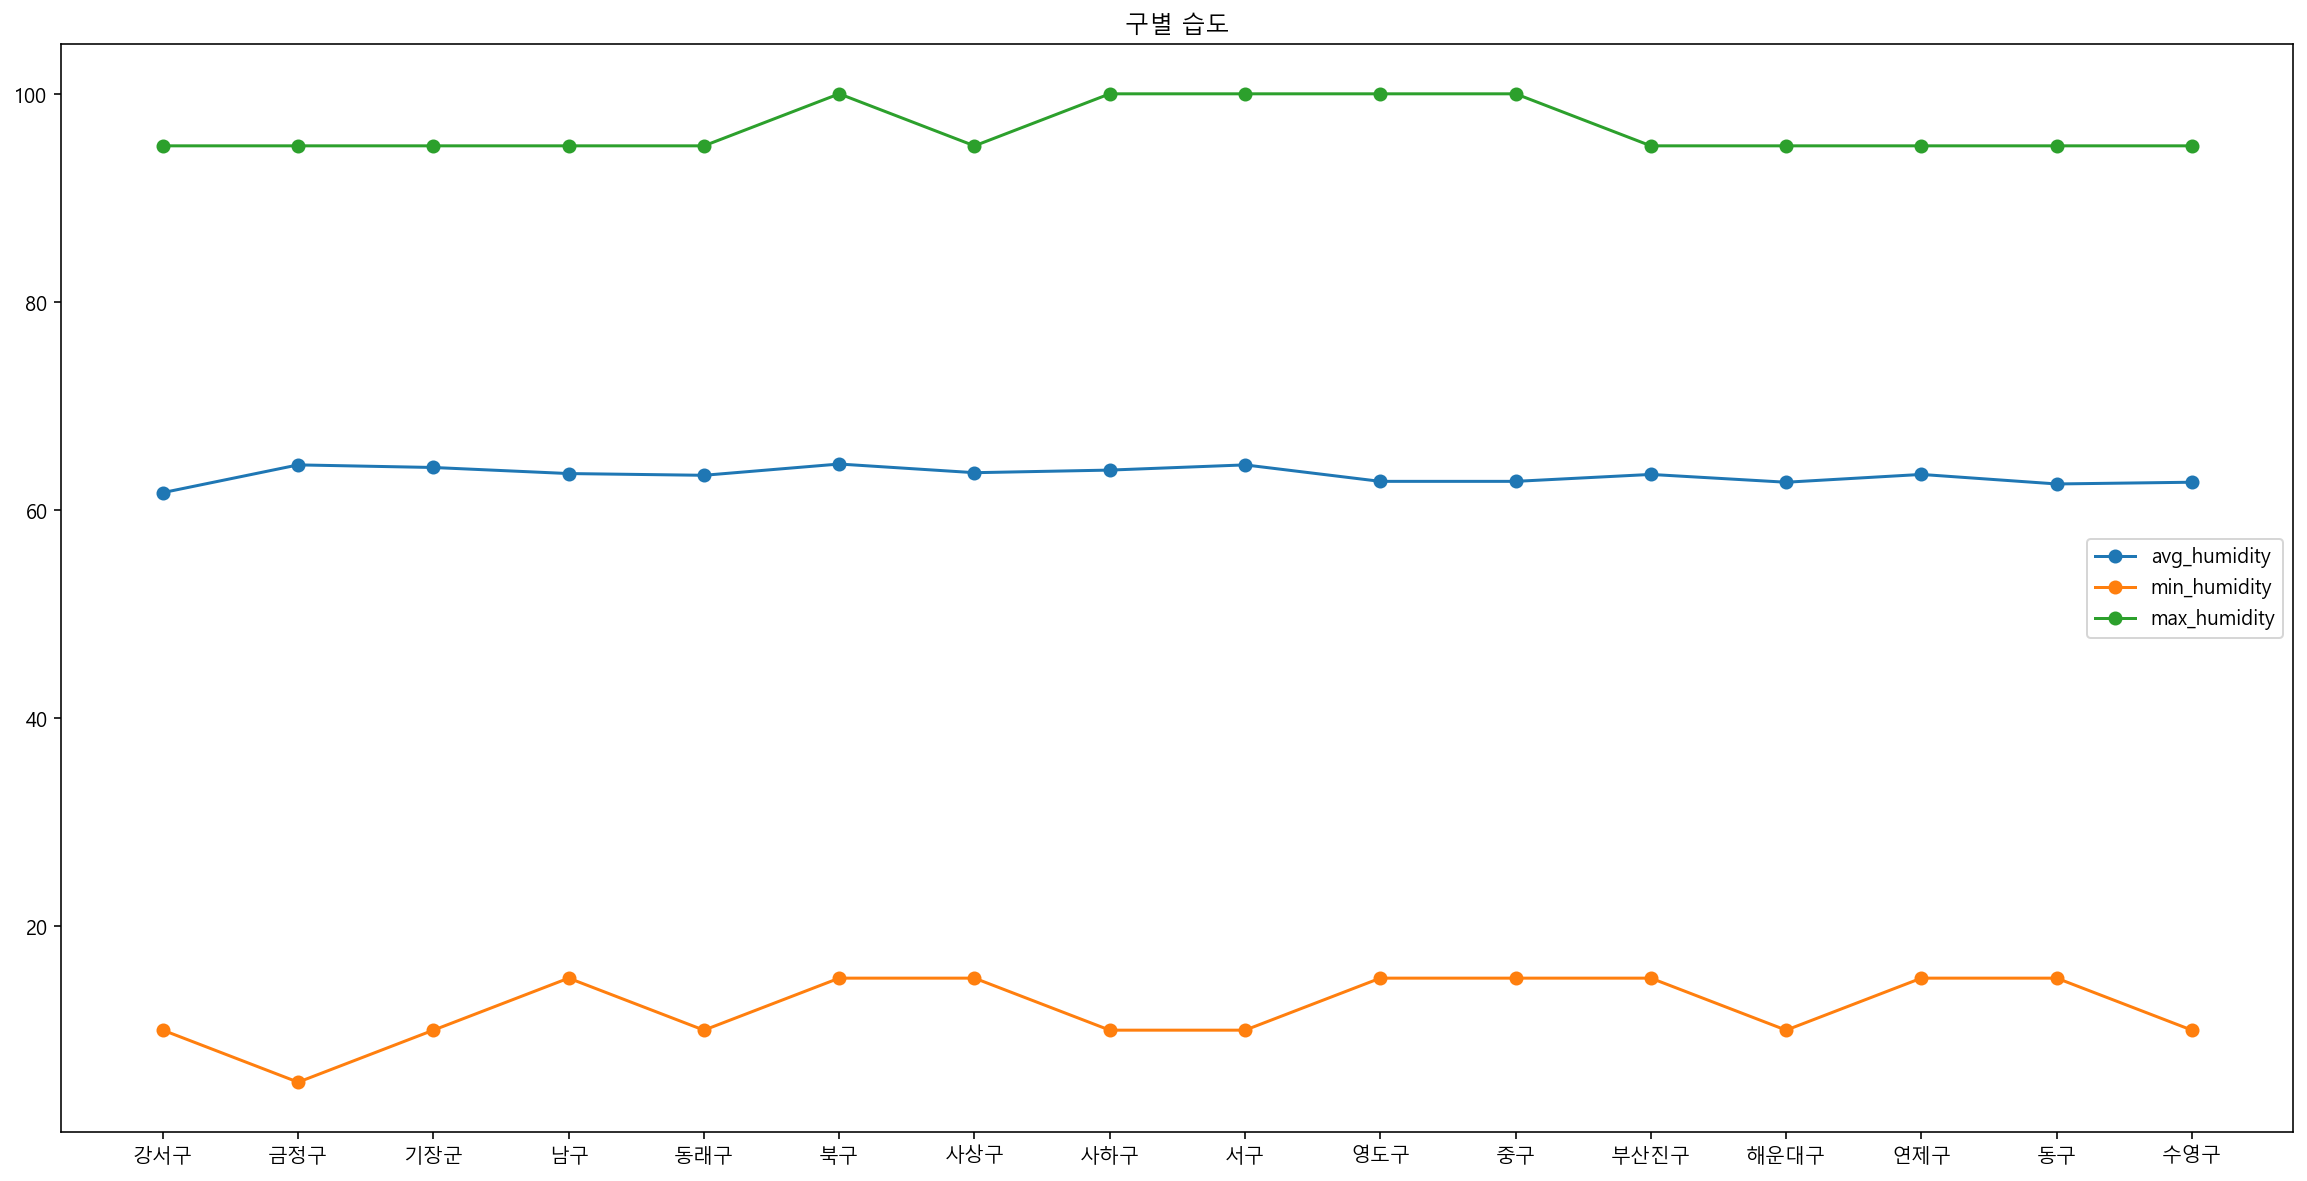

In [5]:
plt.figure(figsize=(20,10))
plt.title('구별 습도')
plt.plot(district, avg_humidity, marker='o', label='avg_humidity')
plt.plot(district, min_humidity, marker='o', label='min_humidity')
plt.plot(district, max_humidity, marker='o', label='max_humidity')

plt.legend()
plt.show()

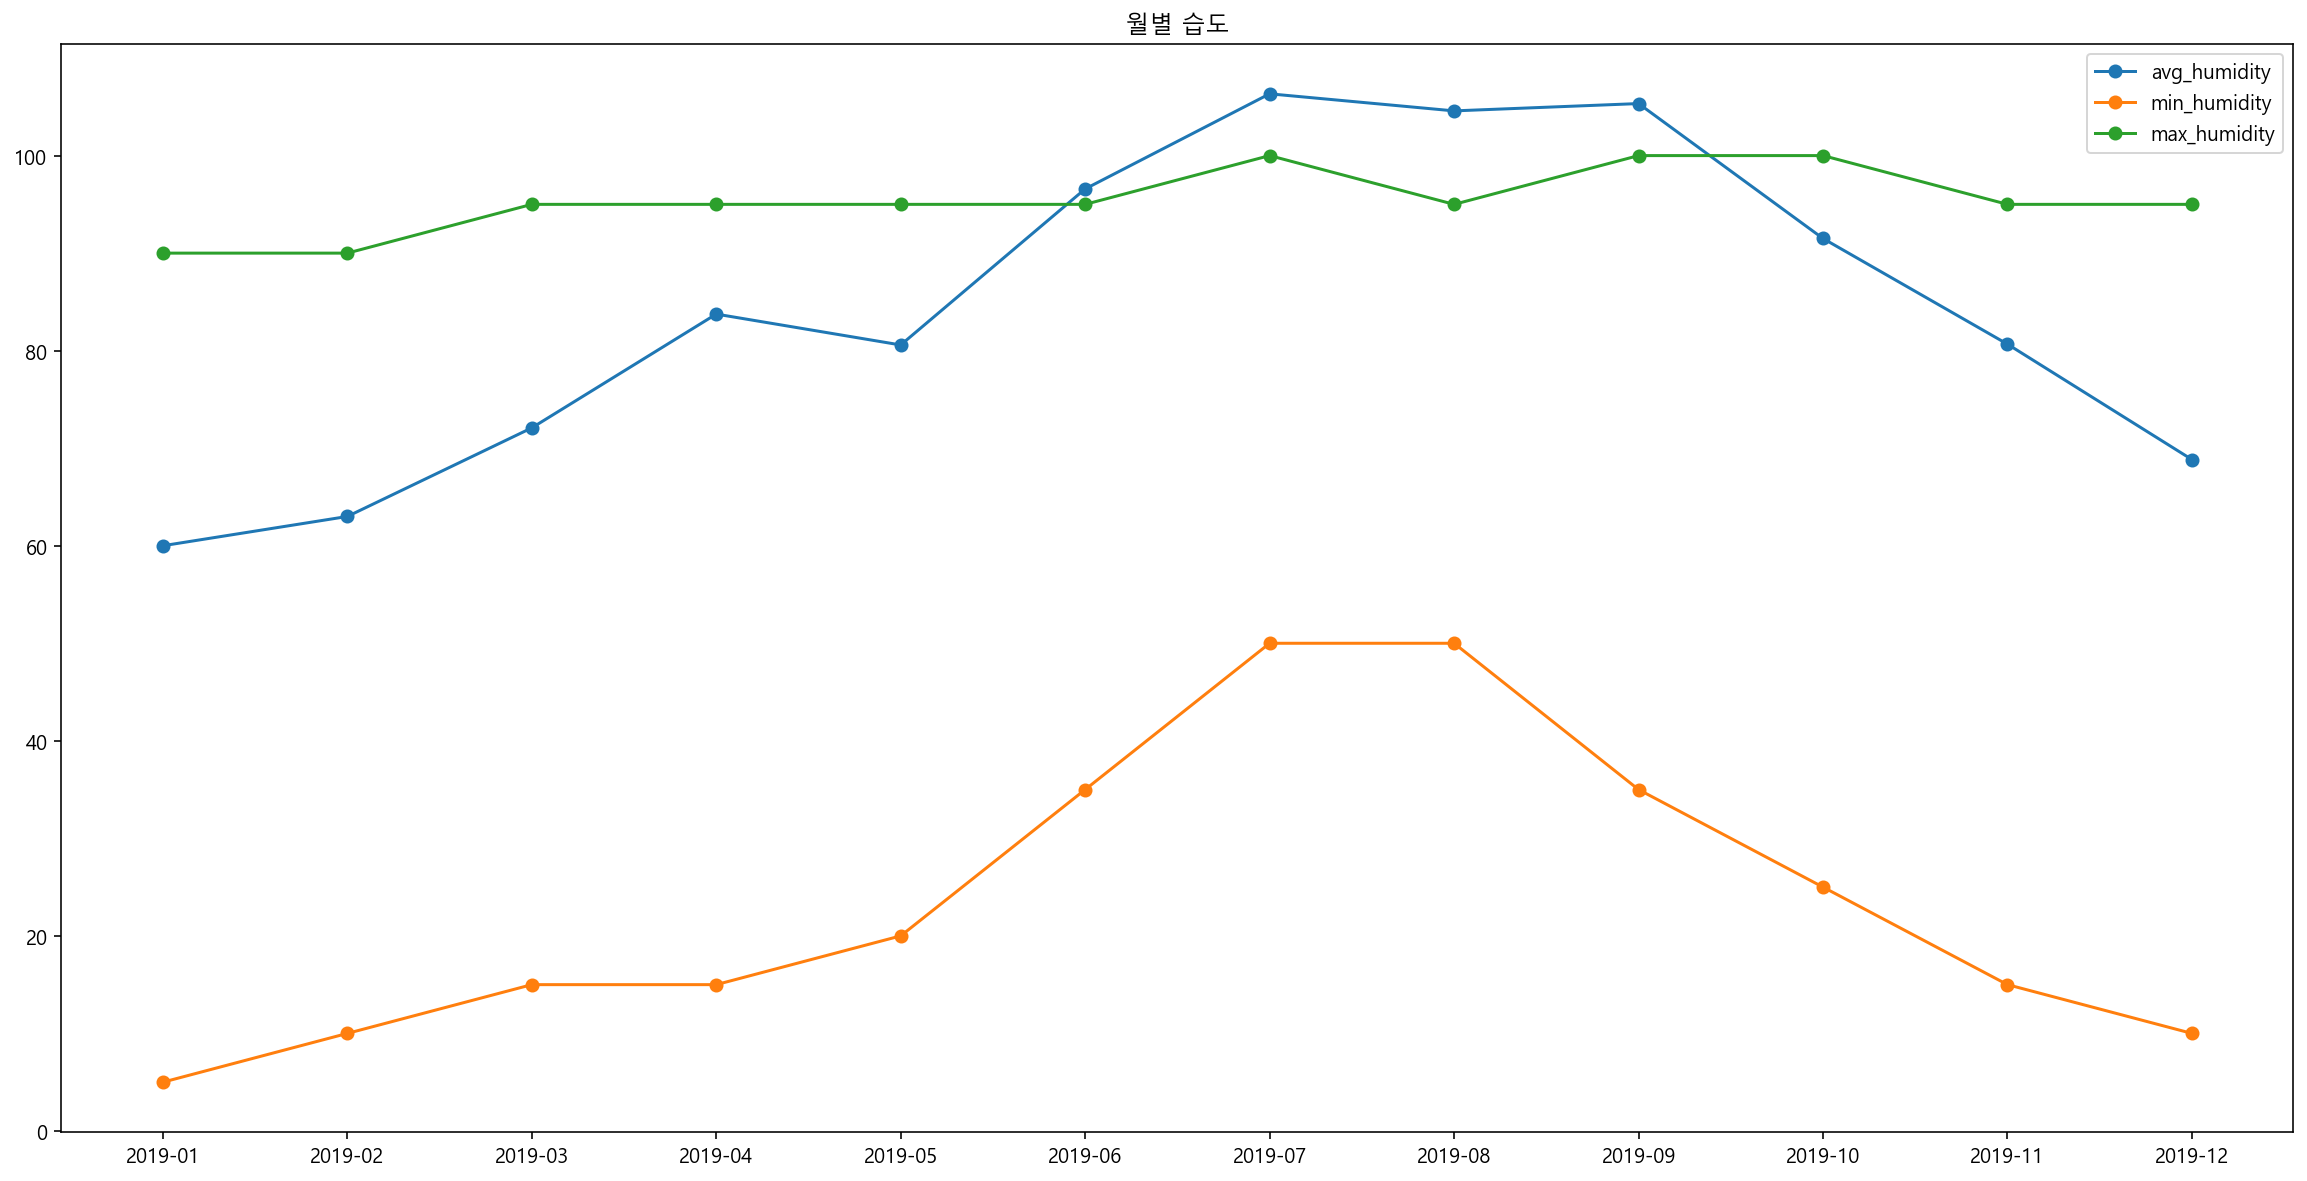

In [6]:
plt.figure(figsize=(20,10))
plt.title('월별 습도')
plt.plot(month, avg_humidity_m, marker='o', label='avg_humidity')
plt.plot(month, min_humidity_m, marker='o', label='min_humidity')
plt.plot(month, max_humidity_m, marker='o', label='max_humidity')

plt.legend()
plt.show()

In [7]:
factor = pd.read_csv('data2/dw_fire_fighting.csv', encoding='ansi')
factor.head()

,fire_date,city,district,district_code,fire_type,type_code,fire_source,fire_source_code,fire_factor,fire_factor_code,casualties,dead,injury,property_damage,place,place_code
0,2019-01,부산광역시,부산진구,D07,"건축,구조물",T05,작동기기,S02,전기적 요인,F05,0,0,0,45,기타,P05
1,2019-01,부산광역시,남구,D04,"건축,구조물",T05,미상,S04,미상,F04,0,0,0,2997,공동주택,P02
2,2019-01,부산광역시,사상구,D09,"건축,구조물",T05,미상,S04,미상,F04,0,0,0,0,단독주택,P07
3,2019-01,부산광역시,강서구,D01,"건축,구조물",T05,"담뱃불, 라이터불",S07,부주의,F01,0,0,0,113,기타,P05
4,2019-01,부산광역시,강서구,D01,"건축,구조물",T05,작동기기,S02,전기적 요인,F05,0,0,0,65,단독주택,P07


In [8]:
# 월 화재건수
monthsum = []
for i in range(len(month)):
    m = factor[factor.fire_date == month[i]]
    ms = m['fire_date'].count()
    monthsum.append(ms)
    
# 월 피해규모
m_damagesum = []
for i in range(len(month)):
    m = factor[factor.fire_date == month[i]]
    ds = m['property_damage'].sum()
    m_damagesum.append(ds)

In [9]:
# 월별 화재건수
month_df = pd.DataFrame({
    'fire_date': month,
    'occur_cnt': monthsum
})

# 월별 피해규모
month_damage_df = pd.DataFrame({
    'fire_date' : month,
    'property_damage_sum_k' : m_damagesum
})

In [10]:
per_case = []
for i in range(len(month_df)):
    per_case.append((month_damage_df['property_damage_sum_k'][i] / month_df['occur_cnt'][i]))
    
per_case

[1286.8653846153845,
 4293.6,
 1901.979797979798,
 5209.915841584158,
 2318.7897196261683,
 856.2443181818181,
 5736.395238095238,
 1398.5074626865671,
 1209.218274111675,
 1077.1505376344087,
 2544.9117647058824,
 3078.1115702479337]

In [11]:
district_sum = [] # 구 발생건수
for i in range(len(district)):
    d = factor[factor.district == district[i]]   
    ds = d['district'].count()
    district_sum.append(ds)
    
# 구 피해규모
d_damage_sum = []
for i in range(len(district)):
    d = factor[factor.district == district[i]]
    ds = d['property_damage'].sum()
    d_damage_sum.append(ds)

In [12]:
district_df = pd.DataFrame({
    'district': district,
    'district_code':district_code,
    'occur_cnt' : district_sum
})

d_damage_df = pd.DataFrame({
    'district': district,
    'district_code':district_code,
    'district_property_damage_k': d_damage_sum
})


## 습도 - 월별 화재건수,피해규모 및 구별 화재건수, 피해규모

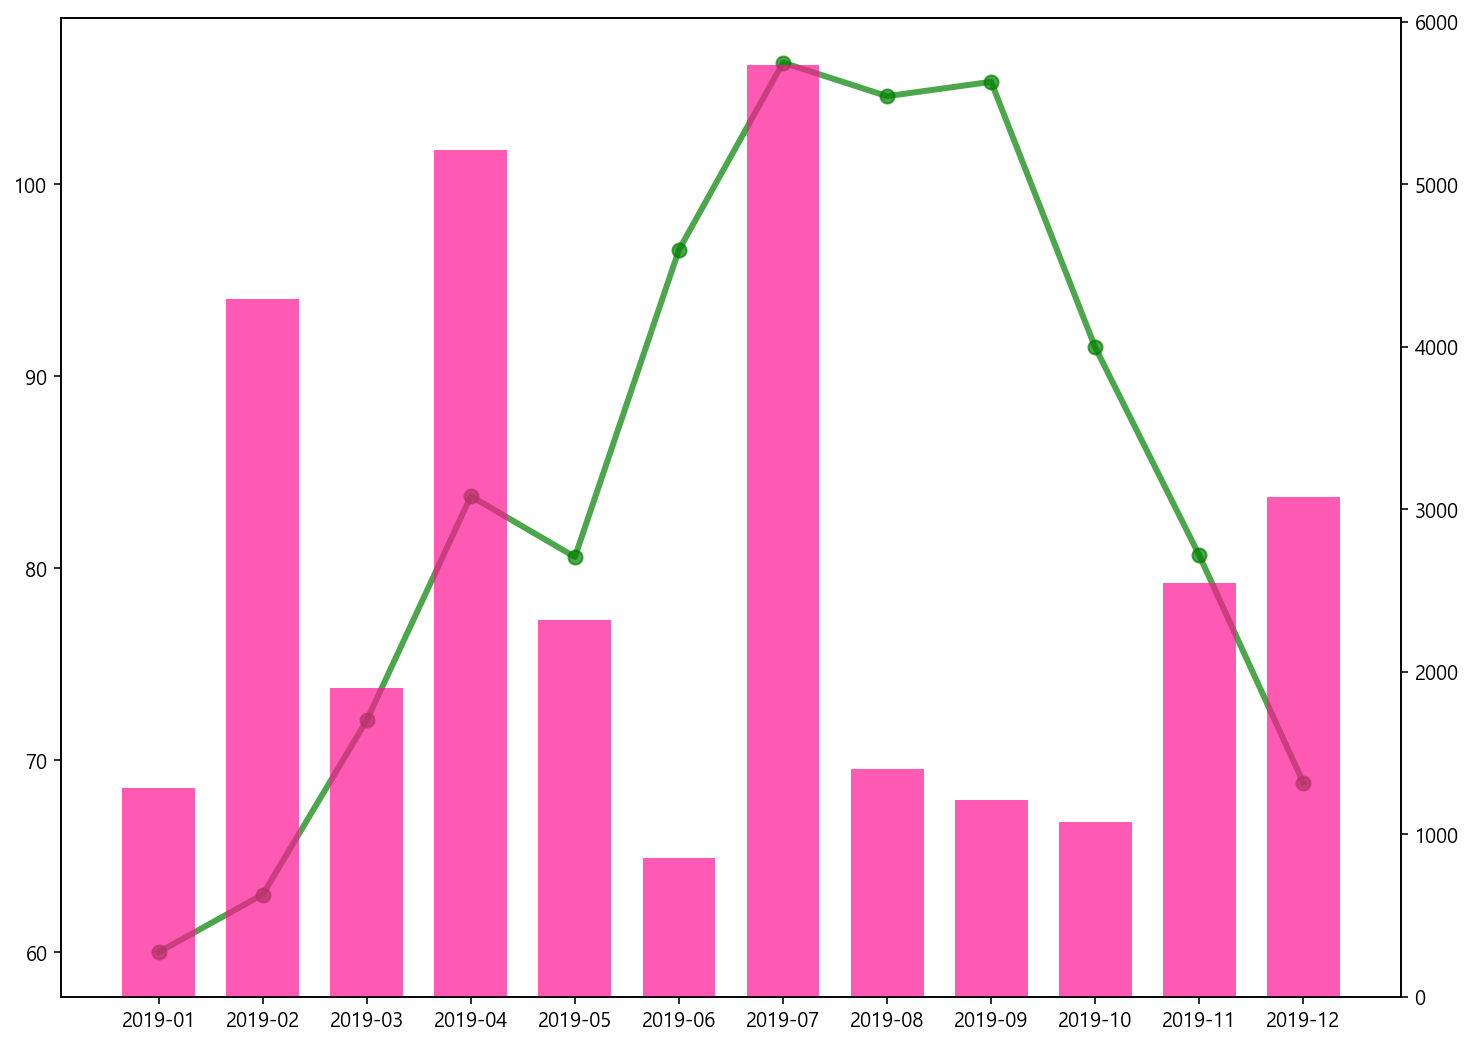

In [13]:
# 월별 화재건수당 피해규모 - 습도
fig, ax1 = plt.subplots()
ax1.plot(month, avg_humidity_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='avg_humidity', marker='o')
ax2 = ax1.twinx()
ax2.bar(month, per_case, color='deeppink', label='occur_cnt', alpha=0.7, width=0.7)
plt.show()

In [14]:
month_per_humidity_list = [avg_humidity_m, per_case]
h_df = pd.DataFrame(month_per_humidity_list).T
month_per_humidity_corr=h_df.corr(method='pearson')
print(month_per_humidity_corr)

          0         1
0  1.000000 -0.066084
1 -0.066084  1.000000


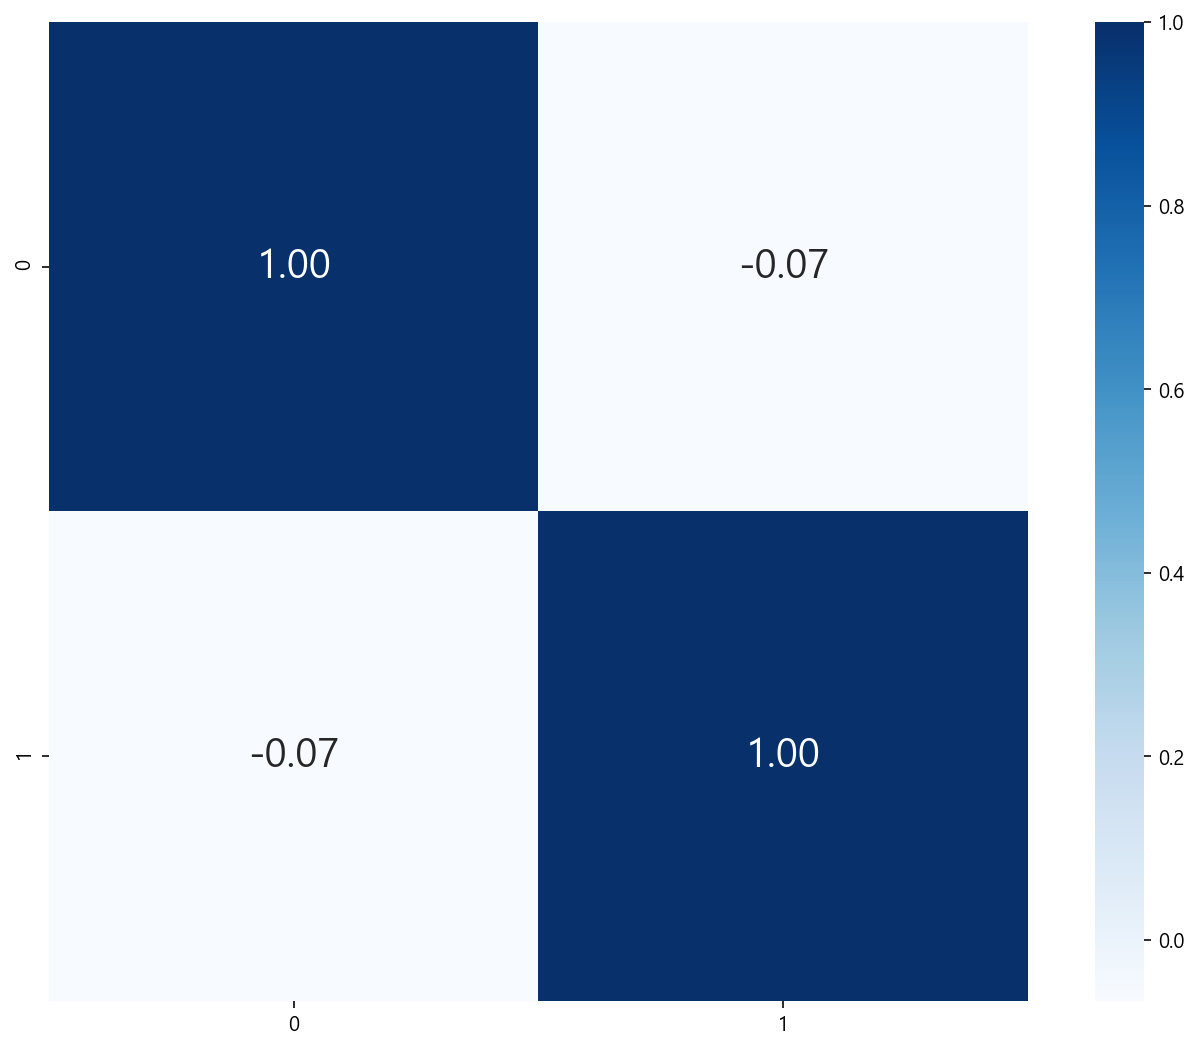

In [15]:
h_df_heatmap = sns.heatmap(month_per_humidity_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

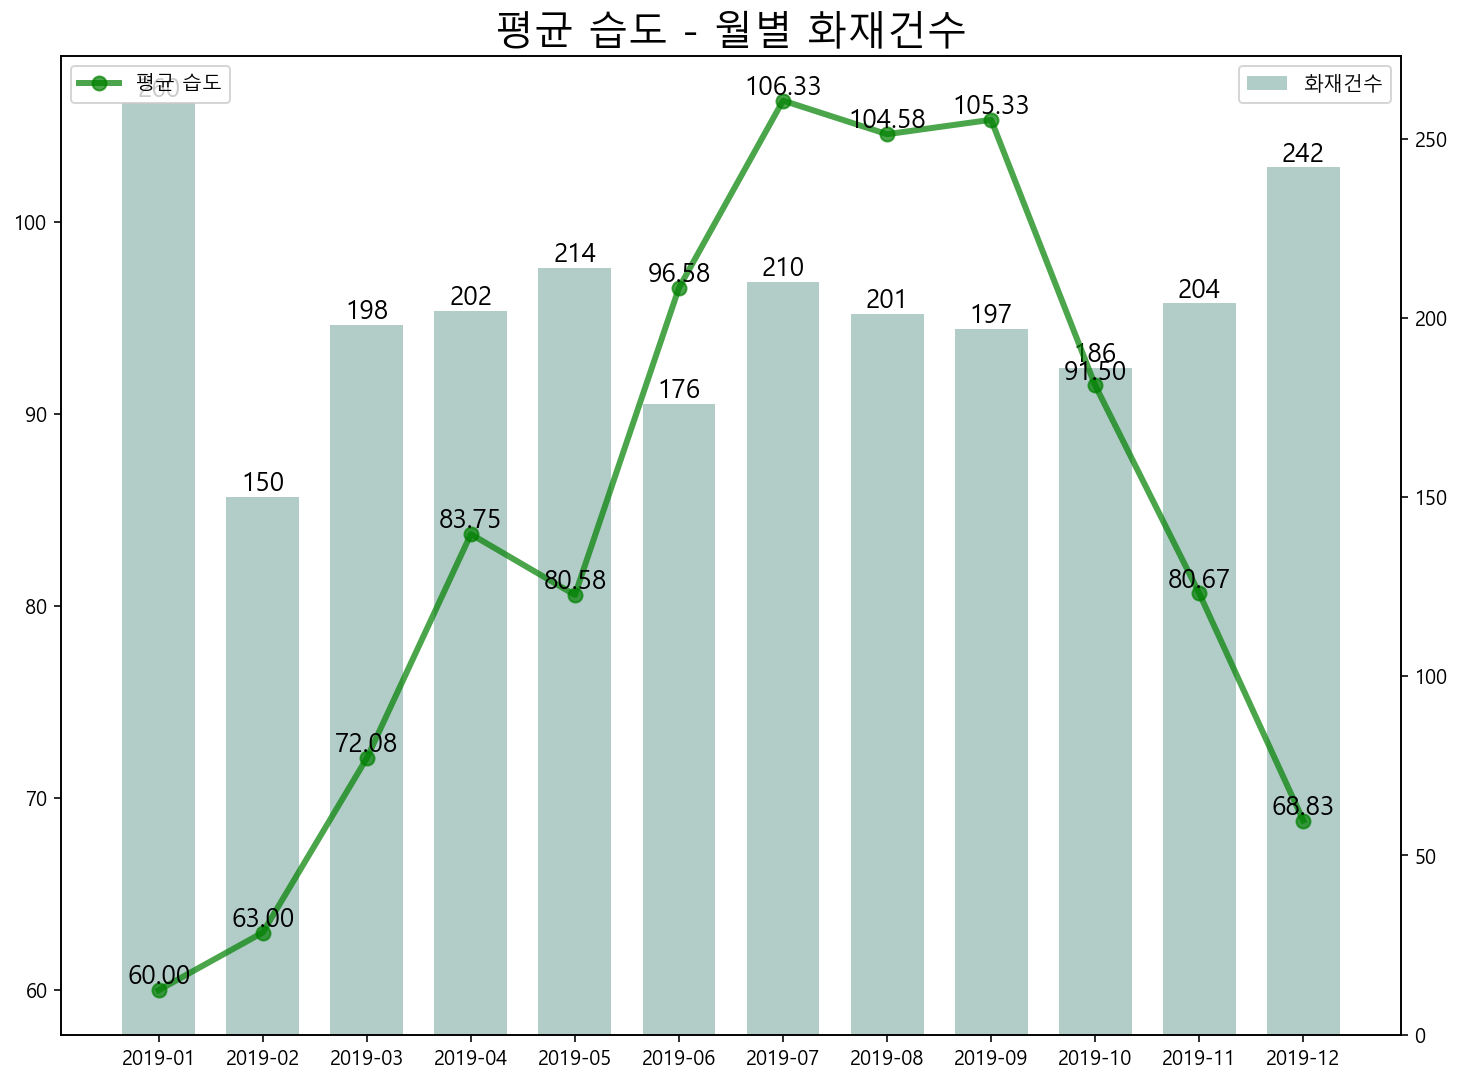

In [16]:
# 평균 습도 - 월별 화재건수
fig, ax1 = plt.subplots()
ax1.plot(month, avg_humidity_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 습도', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_humidity_m[i], str('%.2f'%float(avg_humidity_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
    
ax2 = ax1.twinx()
ax2.bar(month, month_df['occur_cnt'], color='#92b8b1', label='화재건수', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, month_df['occur_cnt'][i], str(month_df['occur_cnt'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
        
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('평균 습도 - 월별 화재건수', fontsize=20)
plt.show()

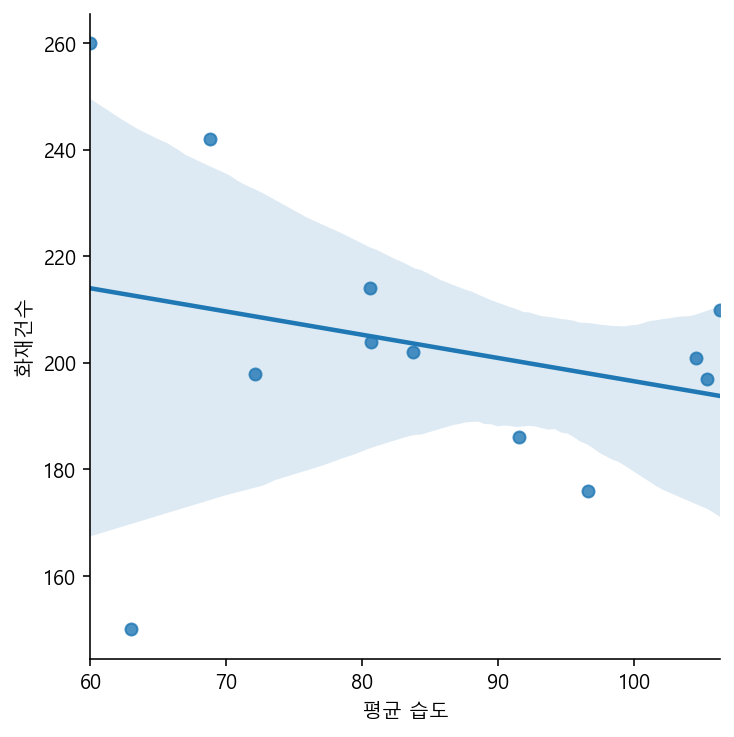

In [17]:
humidity_m_df = pd.DataFrame({
    'month':month,
    'occur_cnt':monthsum,
    'avg_humidity_m':avg_humidity_m,
    'damage_m':m_damagesum
})

sns.lmplot(x='avg_humidity_m' , y='occur_cnt', data=humidity_m_df).set(xlabel='평균 습도', ylabel='화재건수').savefig('images/cor01.png')

In [18]:
# 월별 화재건수 - 습도
month_humidity_list = [avg_humidity_m, monthsum]
h_df = pd.DataFrame(month_humidity_list).T
month_humidity_corr=h_df.corr(method='pearson')
print(month_humidity_corr)

        0       1
0  1.0000 -0.2543
1 -0.2543  1.0000


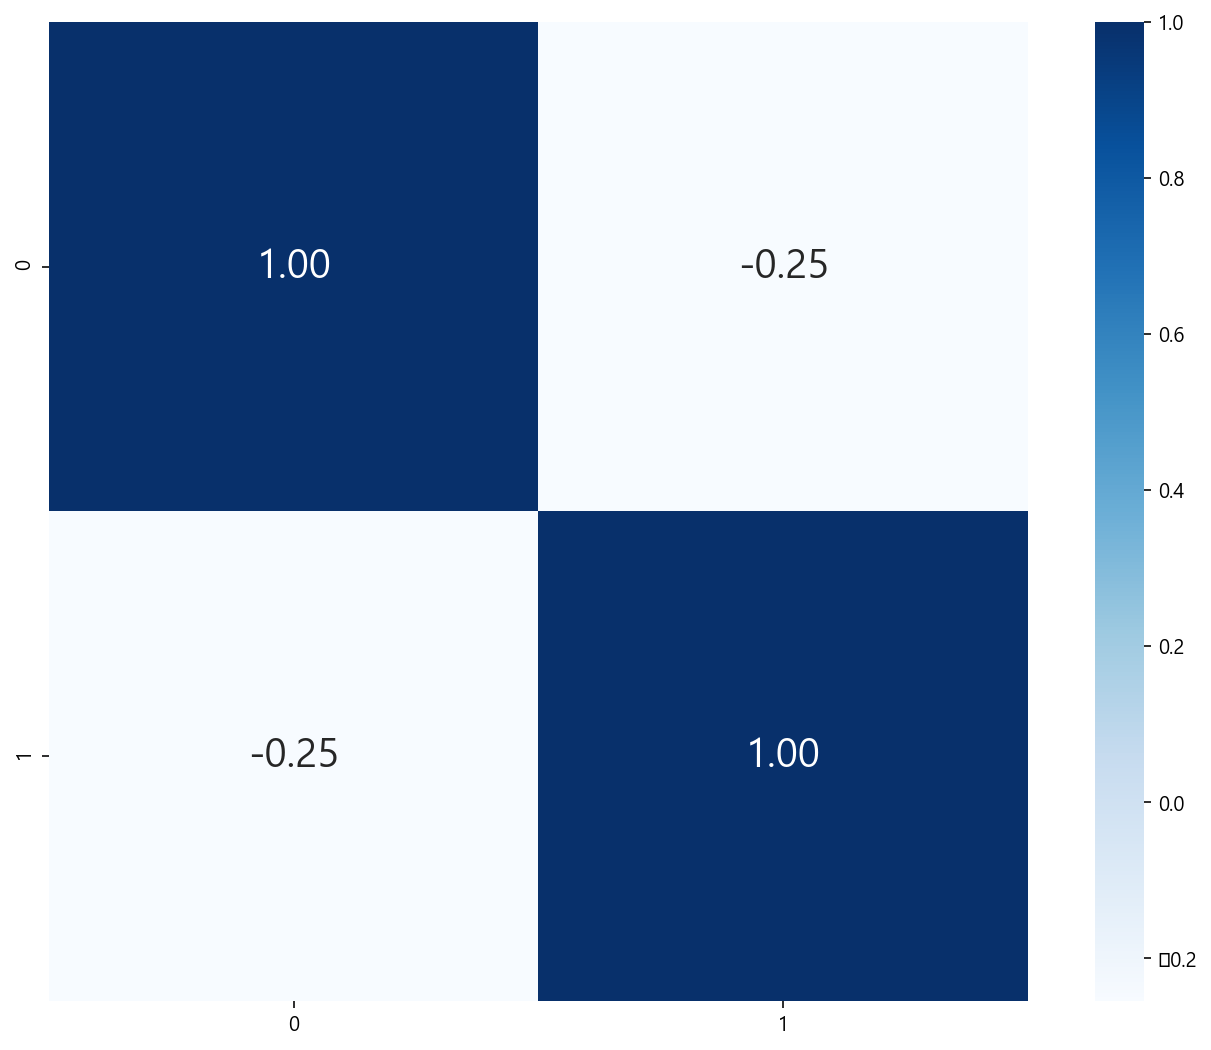

In [19]:
h_df_heatmap = sns.heatmap(month_humidity_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')
# 상대적으로 건조할수록, 화재가 많이 발생
# 상관 계수가 음의 상관관계이며, 습도가 낮을수록, 화재건수가 증가한다.

In [20]:
df = pd.DataFrame({
    'humidity_avg' : avg_humidity_m,
    'monthsum':monthsum
})

(df.humidity_avg - min(df.humidity_avg)).corr(df.monthsum)

-0.254299533463436

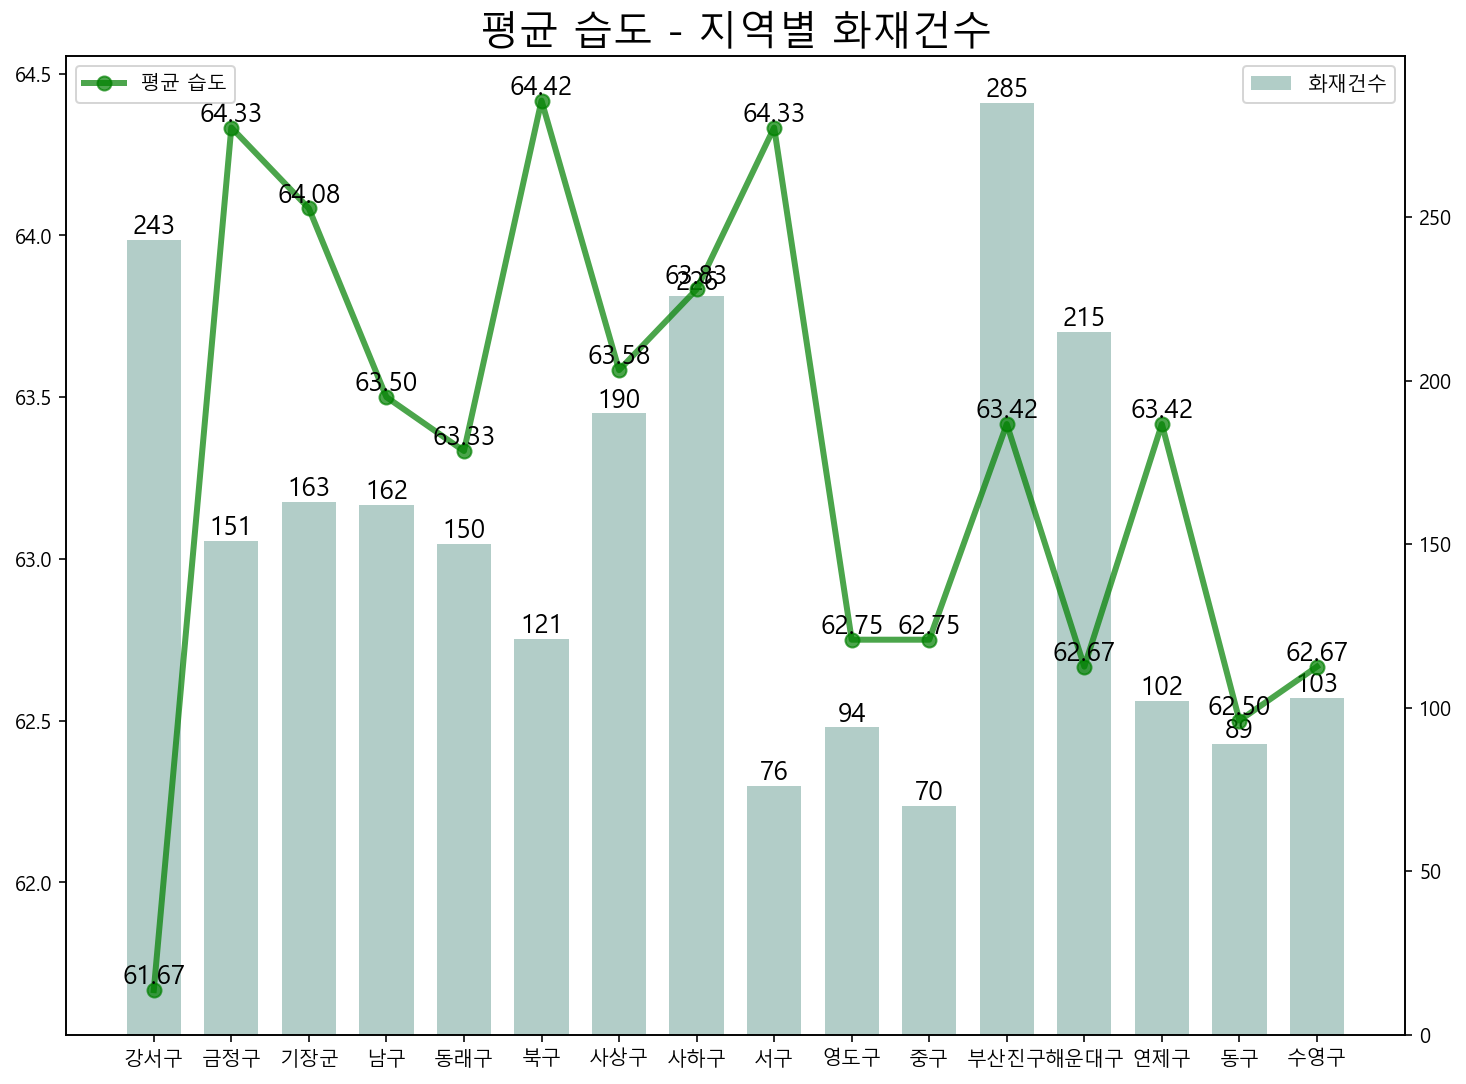

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(district, avg_humidity, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 습도', marker='o')
for i, v in enumerate(district):
        plt.text(v, avg_humidity[i], str('%.2f'%float(avg_humidity[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, district_df['occur_cnt'], color='#92b8b1', label='화재건수', alpha=0.7, width=0.7)
for i, v in enumerate(district):
        plt.text(v, district_df['occur_cnt'][i], str(district_df['occur_cnt'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
        
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('평균 습도 - 지역별 화재건수', fontsize=20)
plt.show()

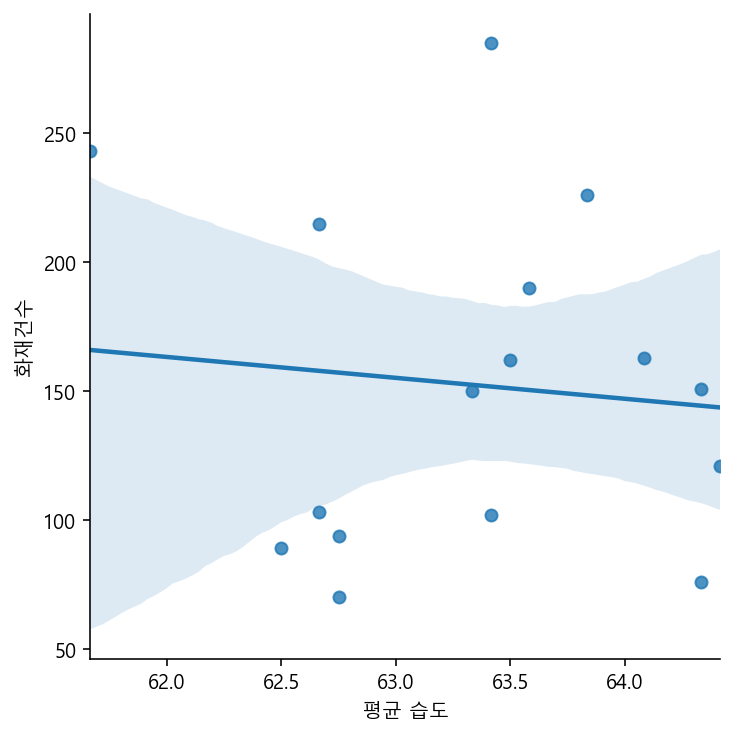

In [22]:
humidity_df = pd.DataFrame({
    'occur_cnt':district_sum,
    'avg_humidity':avg_humidity,
    'd_damage':d_damage_sum
})

sns.lmplot(x='avg_humidity' , y='occur_cnt', data=humidity_df).set(xlabel='평균 습도', ylabel='화재건수').savefig('images/cor02.png')

In [23]:
# 구별 피해건수 - 습도
district_humidity_list = [avg_humidity, district_sum]
h2_df = pd.DataFrame(district_humidity_list).T
district_humidity_corr = h2_df.corr(method='pearson')
print(district_humidity_corr)

          0         1
0  1.000000 -0.097793
1 -0.097793  1.000000


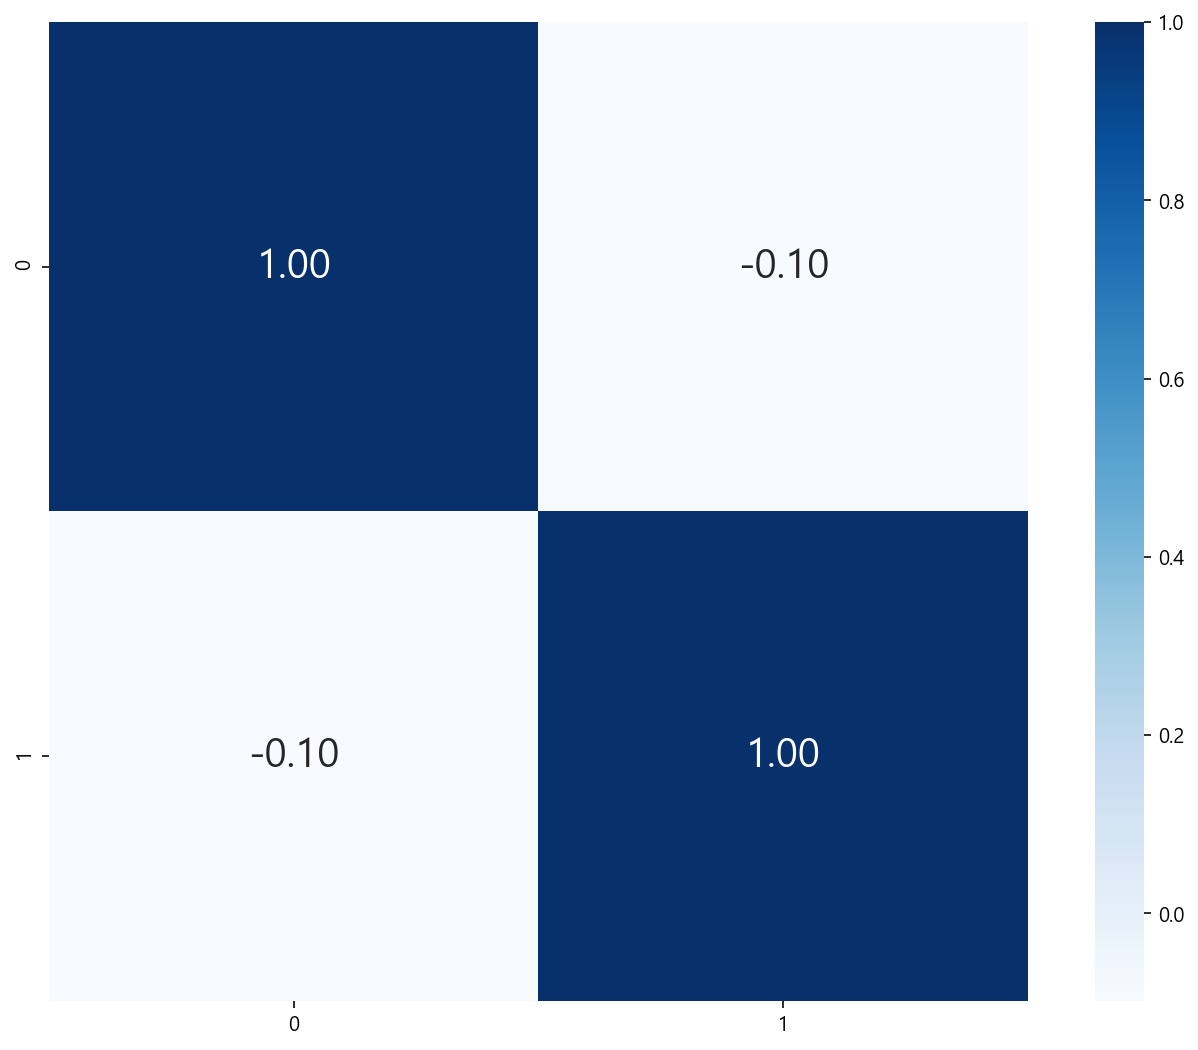

In [24]:
h2_df_heatmap = sns.heatmap(district_humidity_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

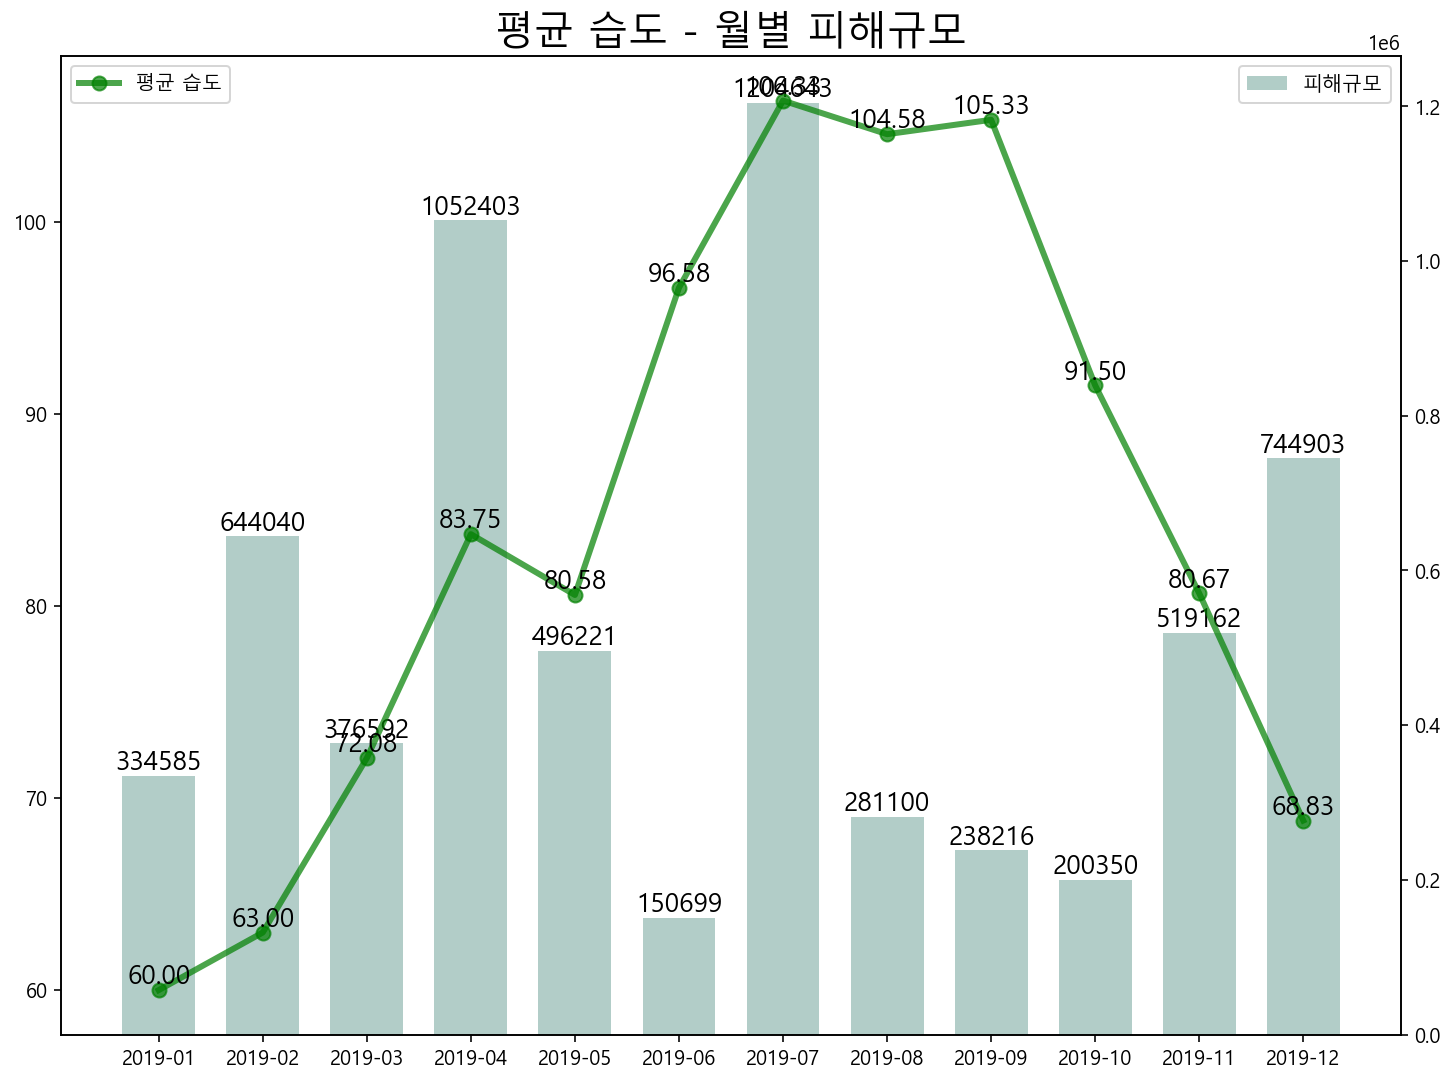

In [25]:
# 평균습도 - 월별 피해규모
fig, ax1 = plt.subplots()
ax1.plot(month, avg_humidity_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 습도', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_humidity_m[i], str('%.2f'%float(avg_humidity_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(month, month_damage_df['property_damage_sum_k'], color='#92b8b1', label='피해규모', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, month_damage_df['property_damage_sum_k'][i], str(month_damage_df['property_damage_sum_k'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('평균 습도 - 월별 피해규모', fontsize=20)
plt.show()

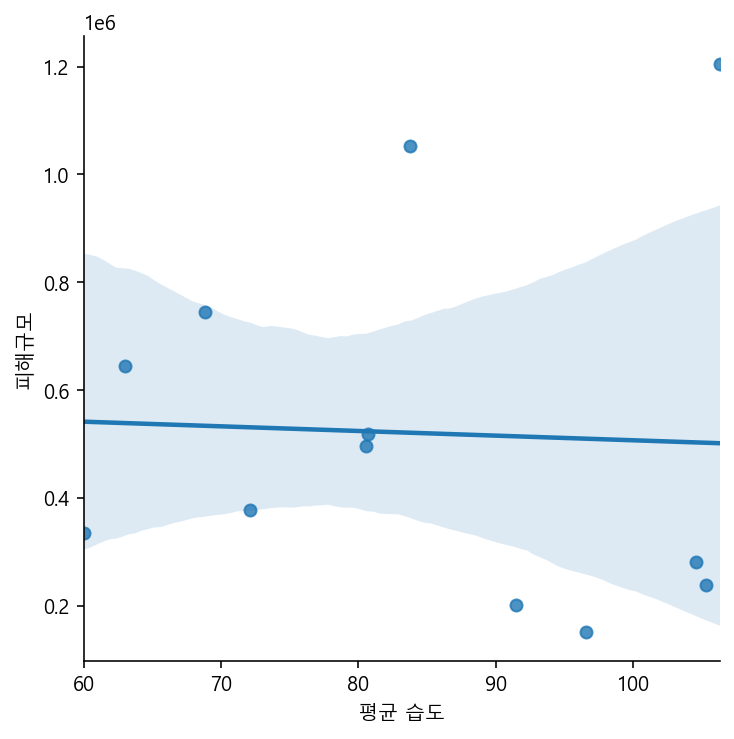

In [26]:
sns.lmplot(x='avg_humidity_m', y='damage_m', data=humidity_m_df).set(xlabel='평균 습도', ylabel='피해규모').savefig('images/cor03.png')

In [27]:
# 월별 피해규모 - 습도
m_damage_list = [avg_humidity_m, m_damagesum]
h3_df = pd.DataFrame(m_damage_list).T
m_damage_corr = h3_df.corr(method='pearson')
print(m_damage_corr)

          0         1
0  1.000000 -0.042306
1 -0.042306  1.000000


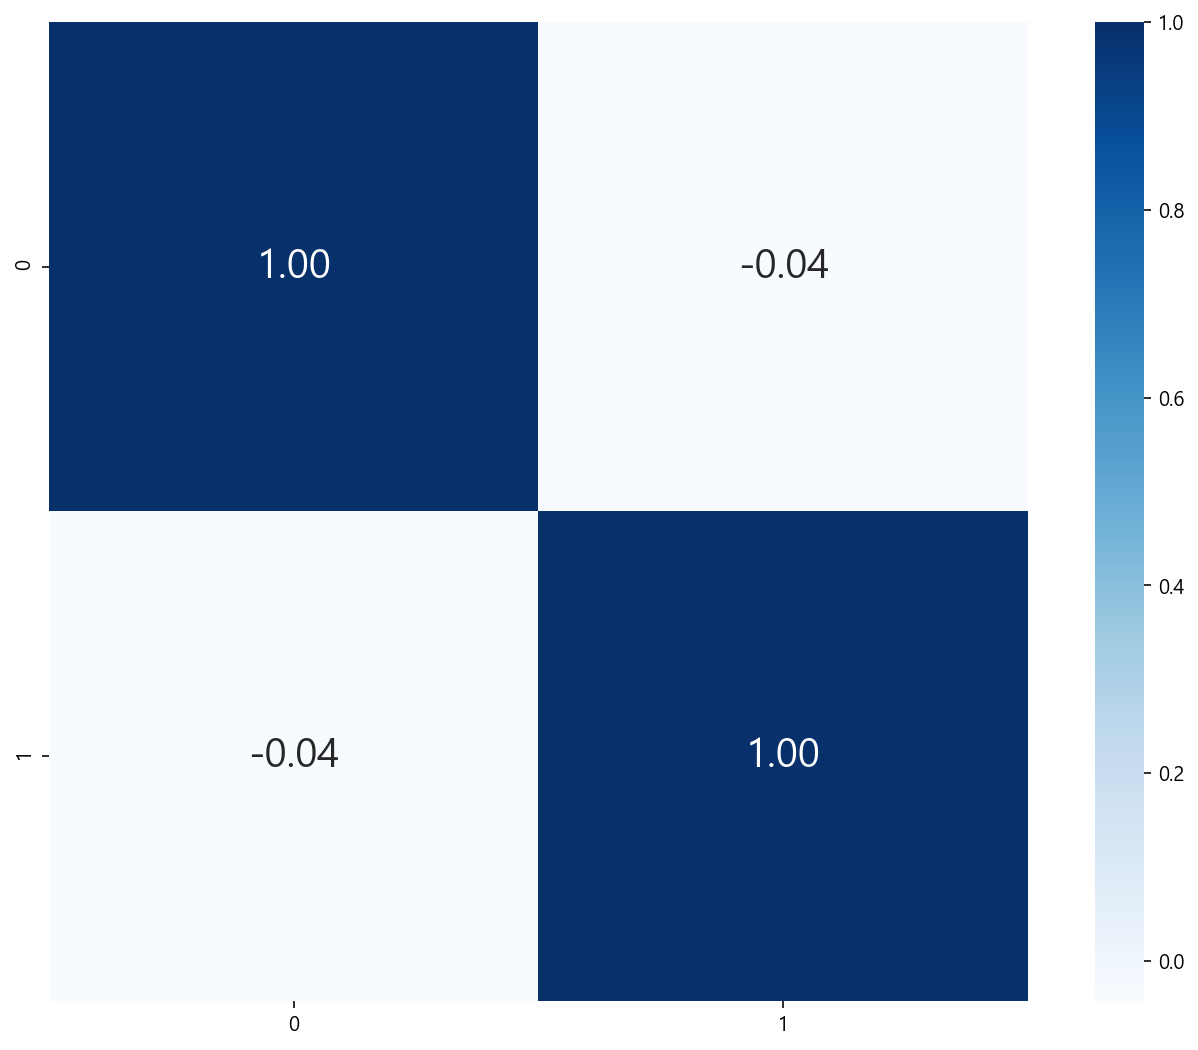

In [28]:
h3_df_heatmap = sns.heatmap(m_damage_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

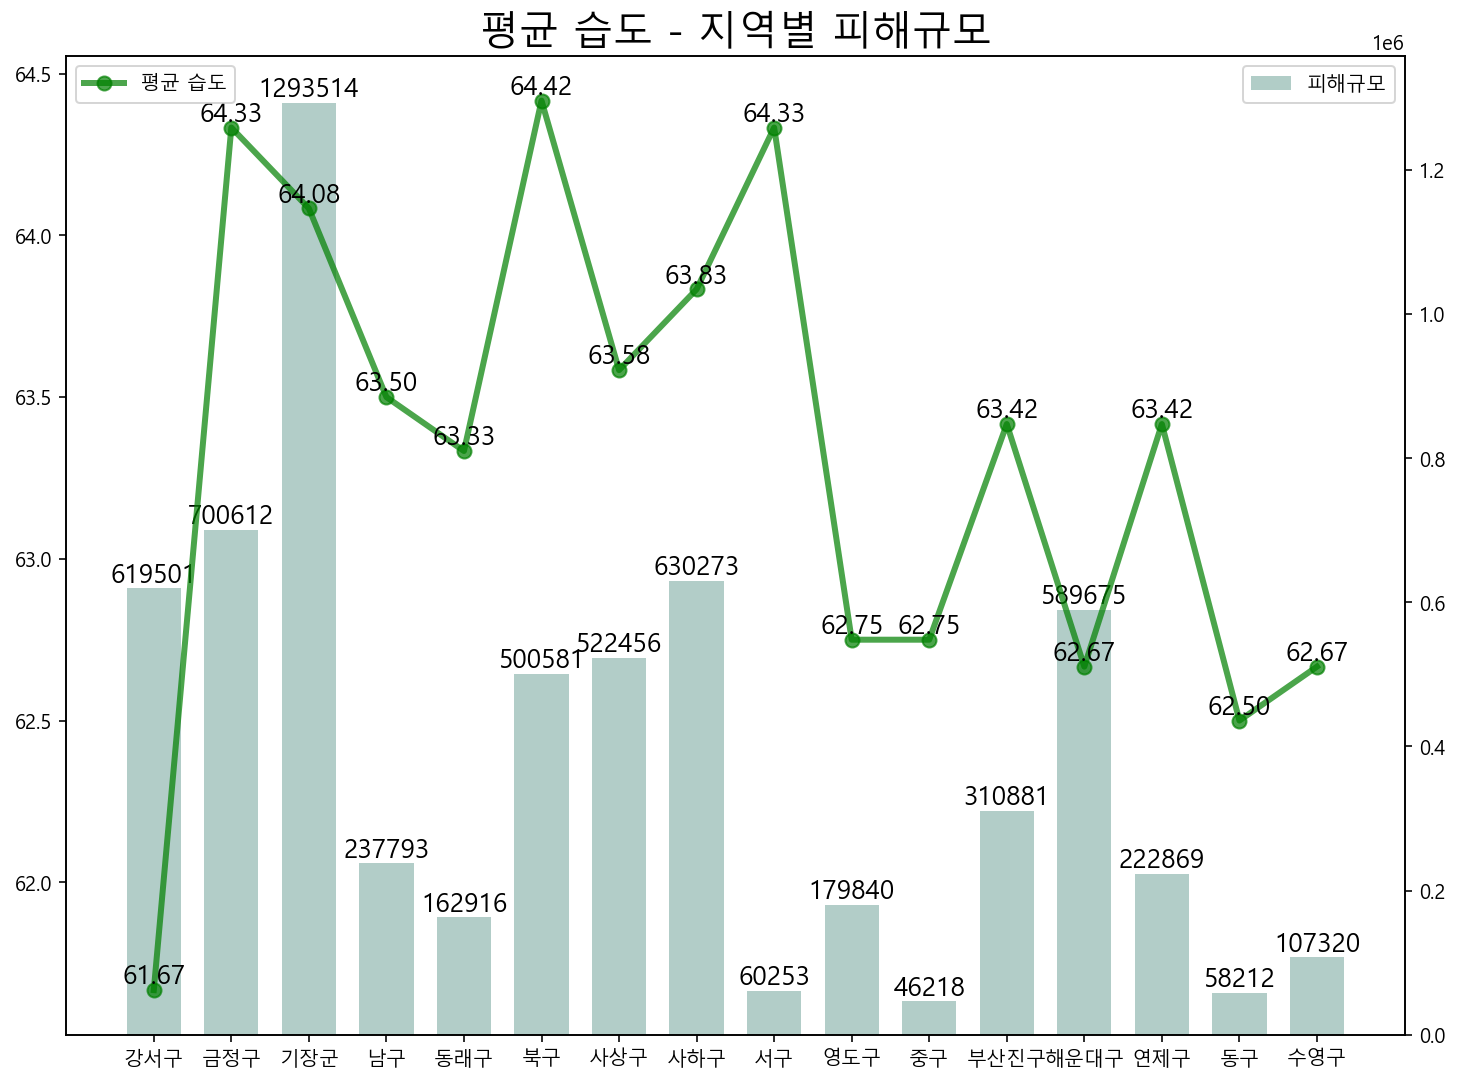

In [29]:
# 평균 습도 - 지역별 피해규모
fig, ax1 = plt.subplots()
ax1.plot(district, avg_humidity, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 습도', marker='o')
for i, v in enumerate(district):
        plt.text(v, avg_humidity[i], str('%.2f'%float(avg_humidity[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, d_damage_df['district_property_damage_k'], color='#92b8b1', label='피해규모', alpha=0.7, width=0.7)
for i, v in enumerate(district):
        plt.text(v, d_damage_df['district_property_damage_k'][i], str(d_damage_df['district_property_damage_k'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
        
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('평균 습도 - 지역별 피해규모', fontsize=20)
plt.show()

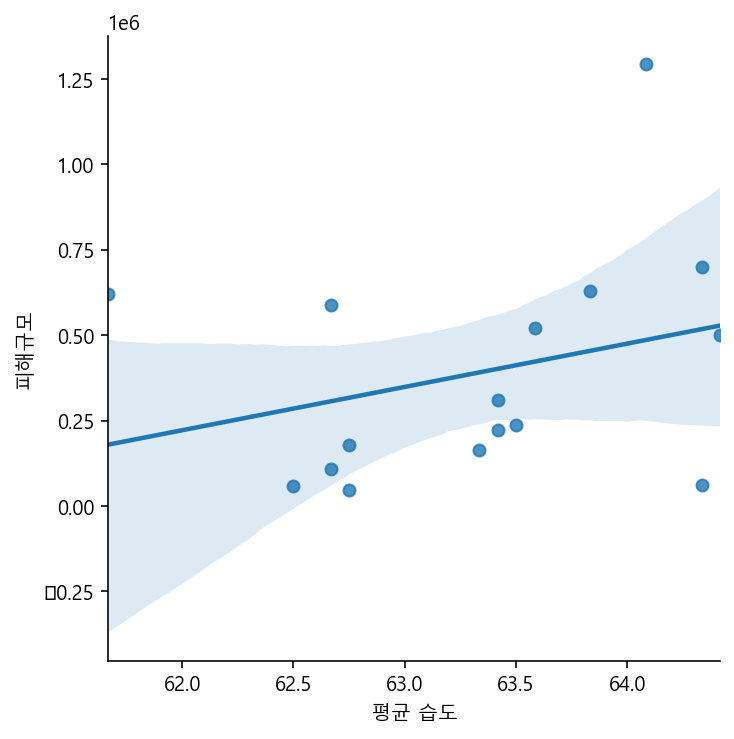

In [30]:
sns.lmplot(x='avg_humidity', y='d_damage', data=humidity_df).set(xlabel='평균 습도', ylabel='피해규모').savefig('images/cor04.png')

In [31]:
# 구별 피해규모 - 습도
d_damage_list = [avg_humidity, d_damage_sum]
h4_df = pd.DataFrame(d_damage_list).T
d_damage_corr = h4_df.corr(method='pearson')
print(d_damage_corr)

          0         1
0  1.000000  0.297206
1  0.297206  1.000000


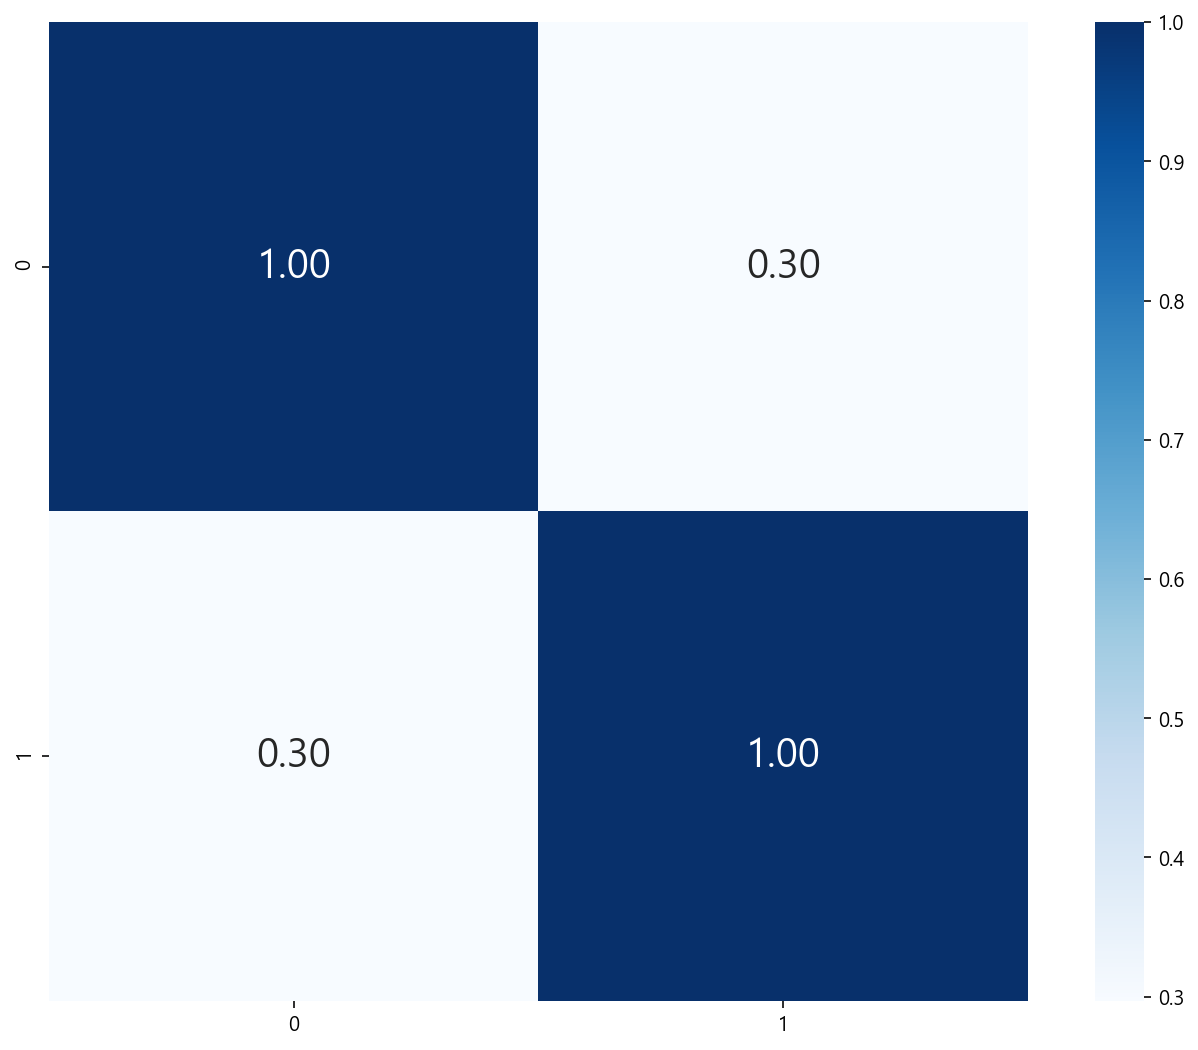

In [32]:
h4_df_heatmap = sns.heatmap(d_damage_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

## 풍속 - 월별 화재건수,피해규모 및 지역별 화재건수,피해규모

In [33]:
wv = pd.read_csv('data2/dw_wind_velocity.csv', encoding='ansi')
wv.head()

,city,district,district_code,wind_velocity_date,avg_wind_velocity,min_wind_velocity,max_wind_velocity
0,부산광역시,중구,D15,2019-01,3.880187,0.2,9.8
1,부산광역시,중구,D15,2019-02,3.216795,0.3,10.2
2,부산광역시,중구,D15,2019-03,4.528291,0.3,14.0
3,부산광역시,중구,D15,2019-04,3.750315,0.1,14.0
4,부산광역시,중구,D15,2019-05,3.172908,0.2,14.0


In [34]:
district = [] # 구
district_code = [] # 구 코드
for c in humidity['district']:
    if c not in district:
        district.append(c)
for d in humidity['district_code']:
    if d not in district_code:
        district_code.append(d)
        
# 월
month = []
for m in humidity['humidity_date']:
    if m not in month:
        month.append(m)
        
# d_avg
avg_wind_velocity = []
for i in range(len(district)):
    d = wv[wv.district == district[i]]   
    ds = d['avg_wind_velocity'].sum()
    dss = ds / 12
    avg_wind_velocity.append(dss)
    
# d_min
min_wind_velocity = []
for i in range(len(district)):
    d = wv[wv.district == district[i]]
    ds = d['min_wind_velocity'].min()
    min_wind_velocity.append(ds)

# d_max
max_wind_velocity = []
for i in range(len(district)):
    d = wv[wv.district == district[i]]
    ds = d['max_wind_velocity'].max()
    max_wind_velocity.append(ds)
    
# m_avg
avg_wind_velocity_m = []
for i in range(len(month)):
    d = wv[wv.wind_velocity_date == month[i]]   
    ds = d['avg_wind_velocity'].sum()
    dss = ds / 12
    avg_wind_velocity_m.append(dss)
    
# m_min
min_wind_velocity_m = []
for i in range(len(month)):
    d = wv[wv.wind_velocity_date == month[i]]
    ds = d['min_wind_velocity'].min()
    min_wind_velocity_m.append(ds)

# m_max
max_wind_velocity_m = []
for i in range(len(month)):
    d = wv[wv.wind_velocity_date == month[i]]
    ds = d['max_wind_velocity'].max()
    max_wind_velocity_m.append(ds)     

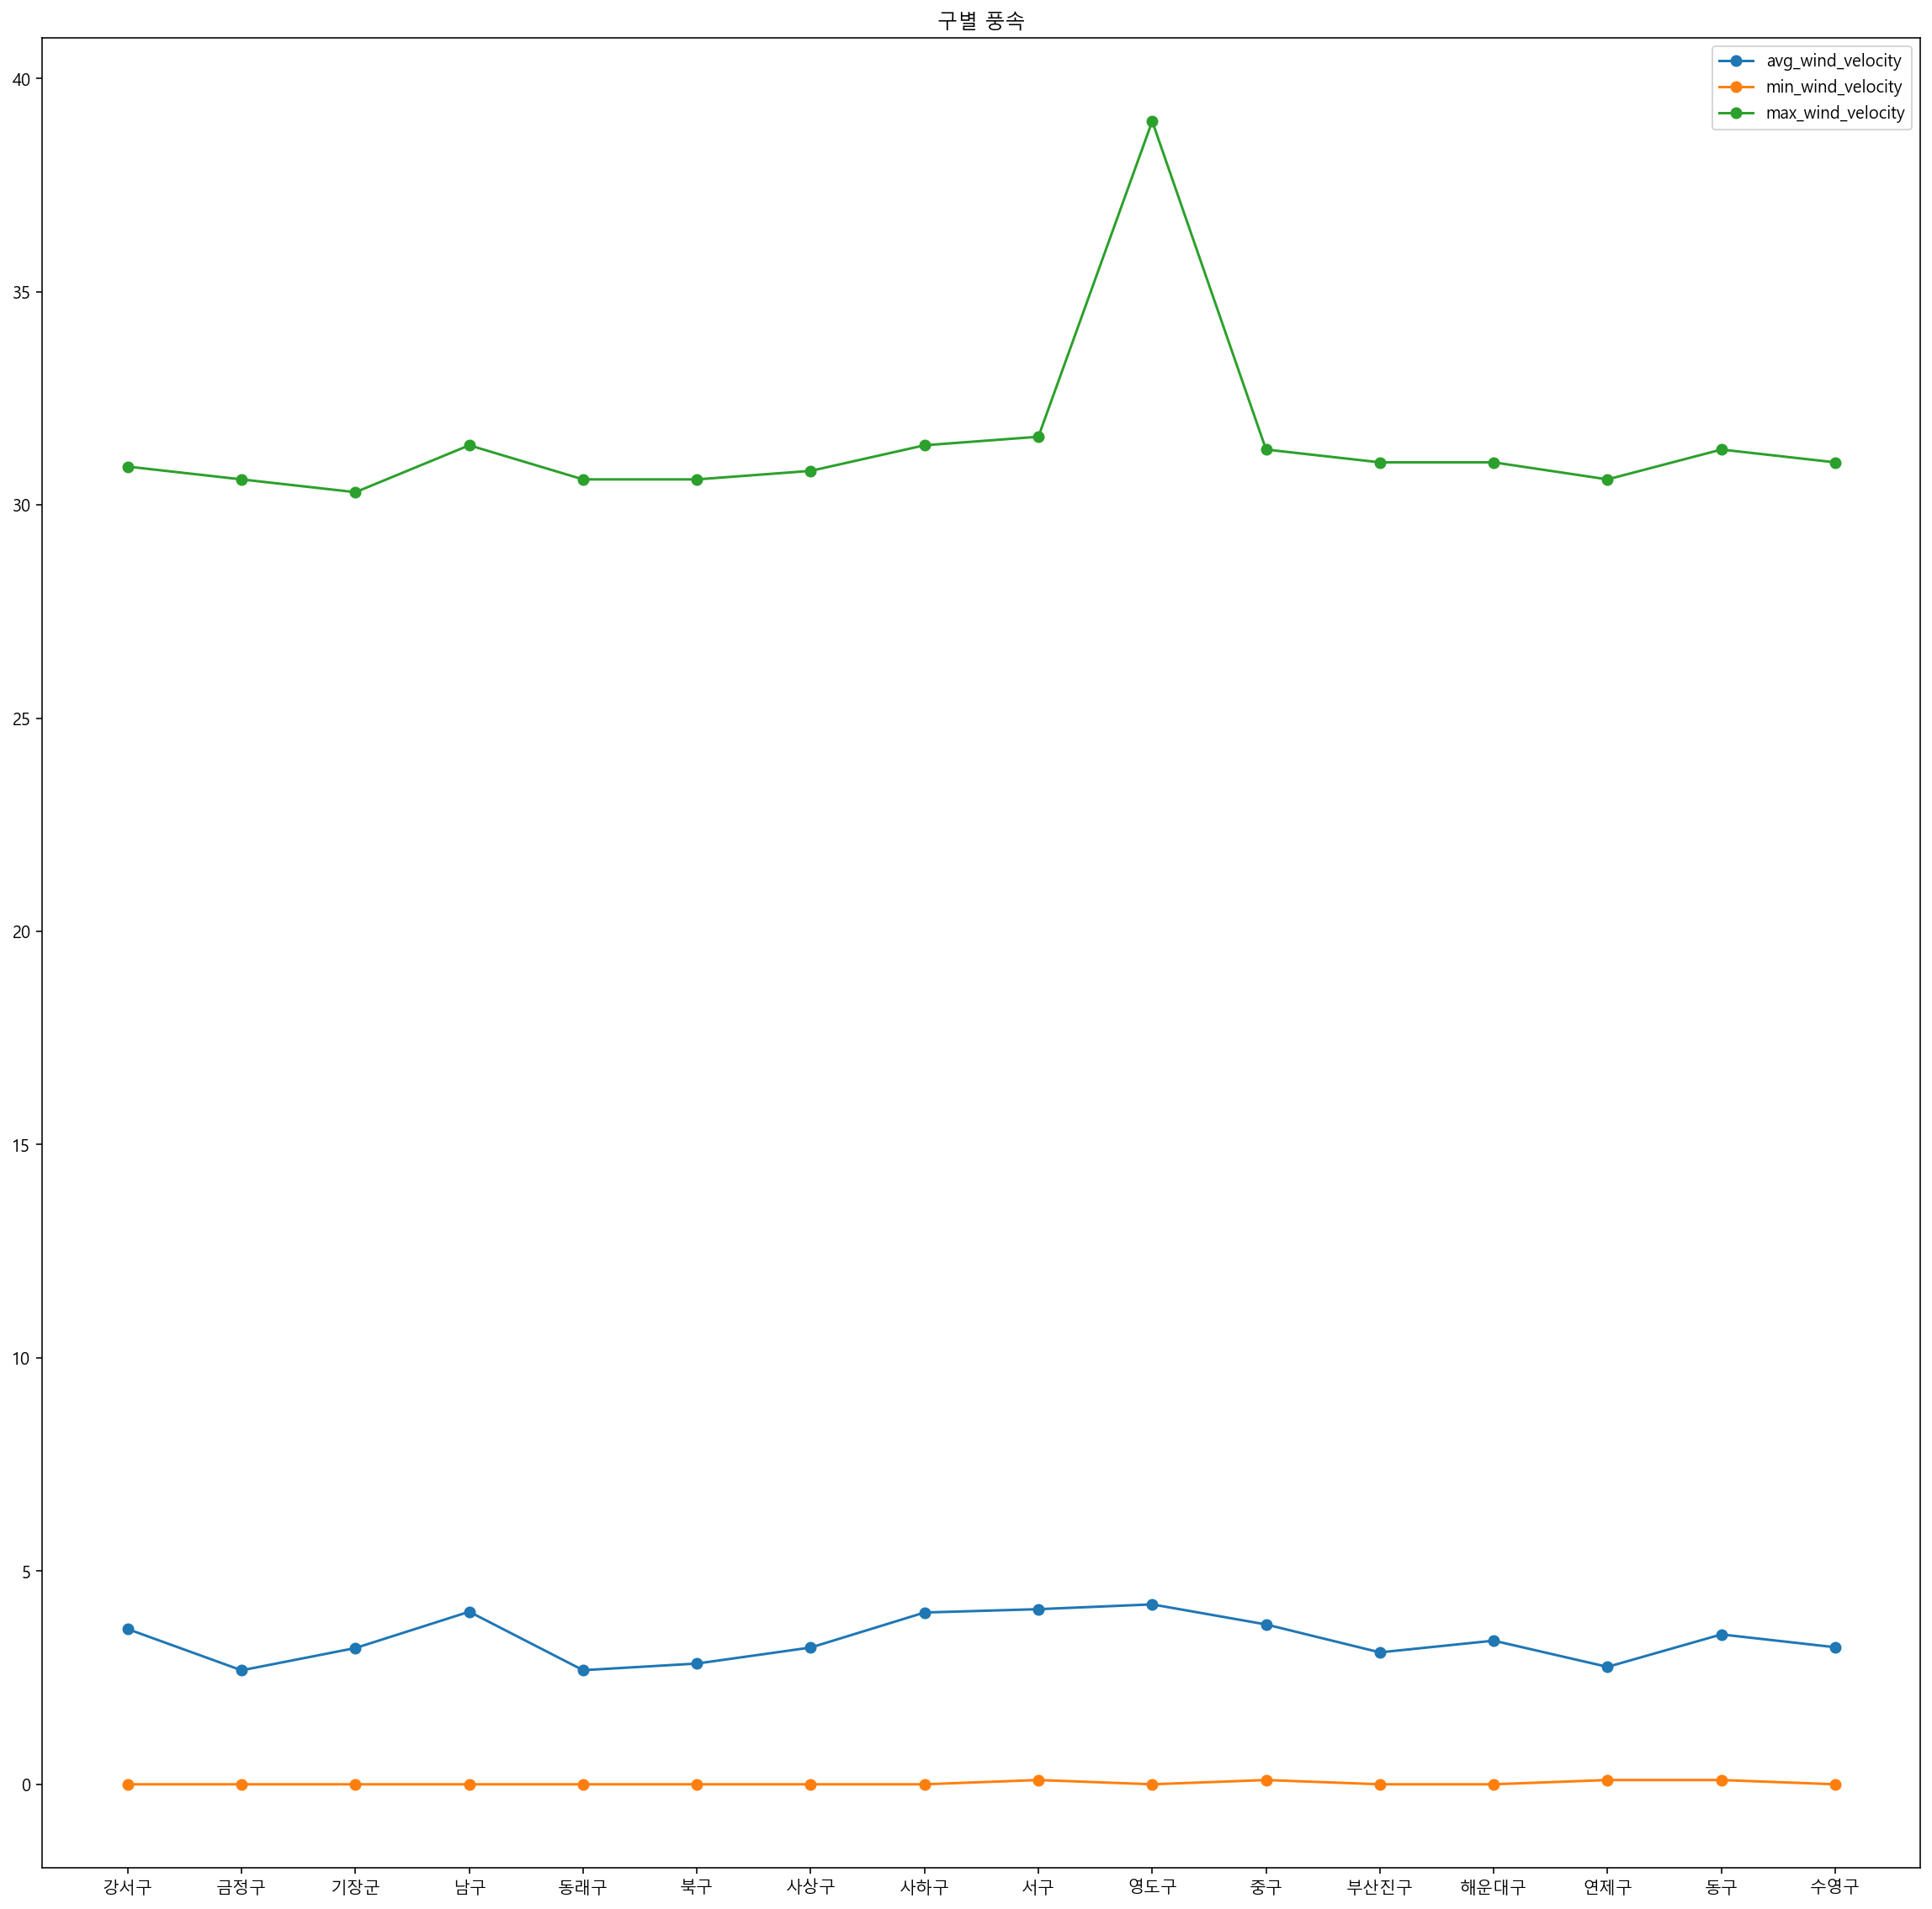

In [35]:
plt.figure(figsize=(20,20))
plt.title('구별 풍속')
plt.plot(district, avg_wind_velocity, marker='o', label='avg_wind_velocity')
plt.plot(district, min_wind_velocity, marker='o', label='min_wind_velocity')
plt.plot(district, max_wind_velocity, marker='o', label='max_wind_velocity')

plt.legend()
plt.show()

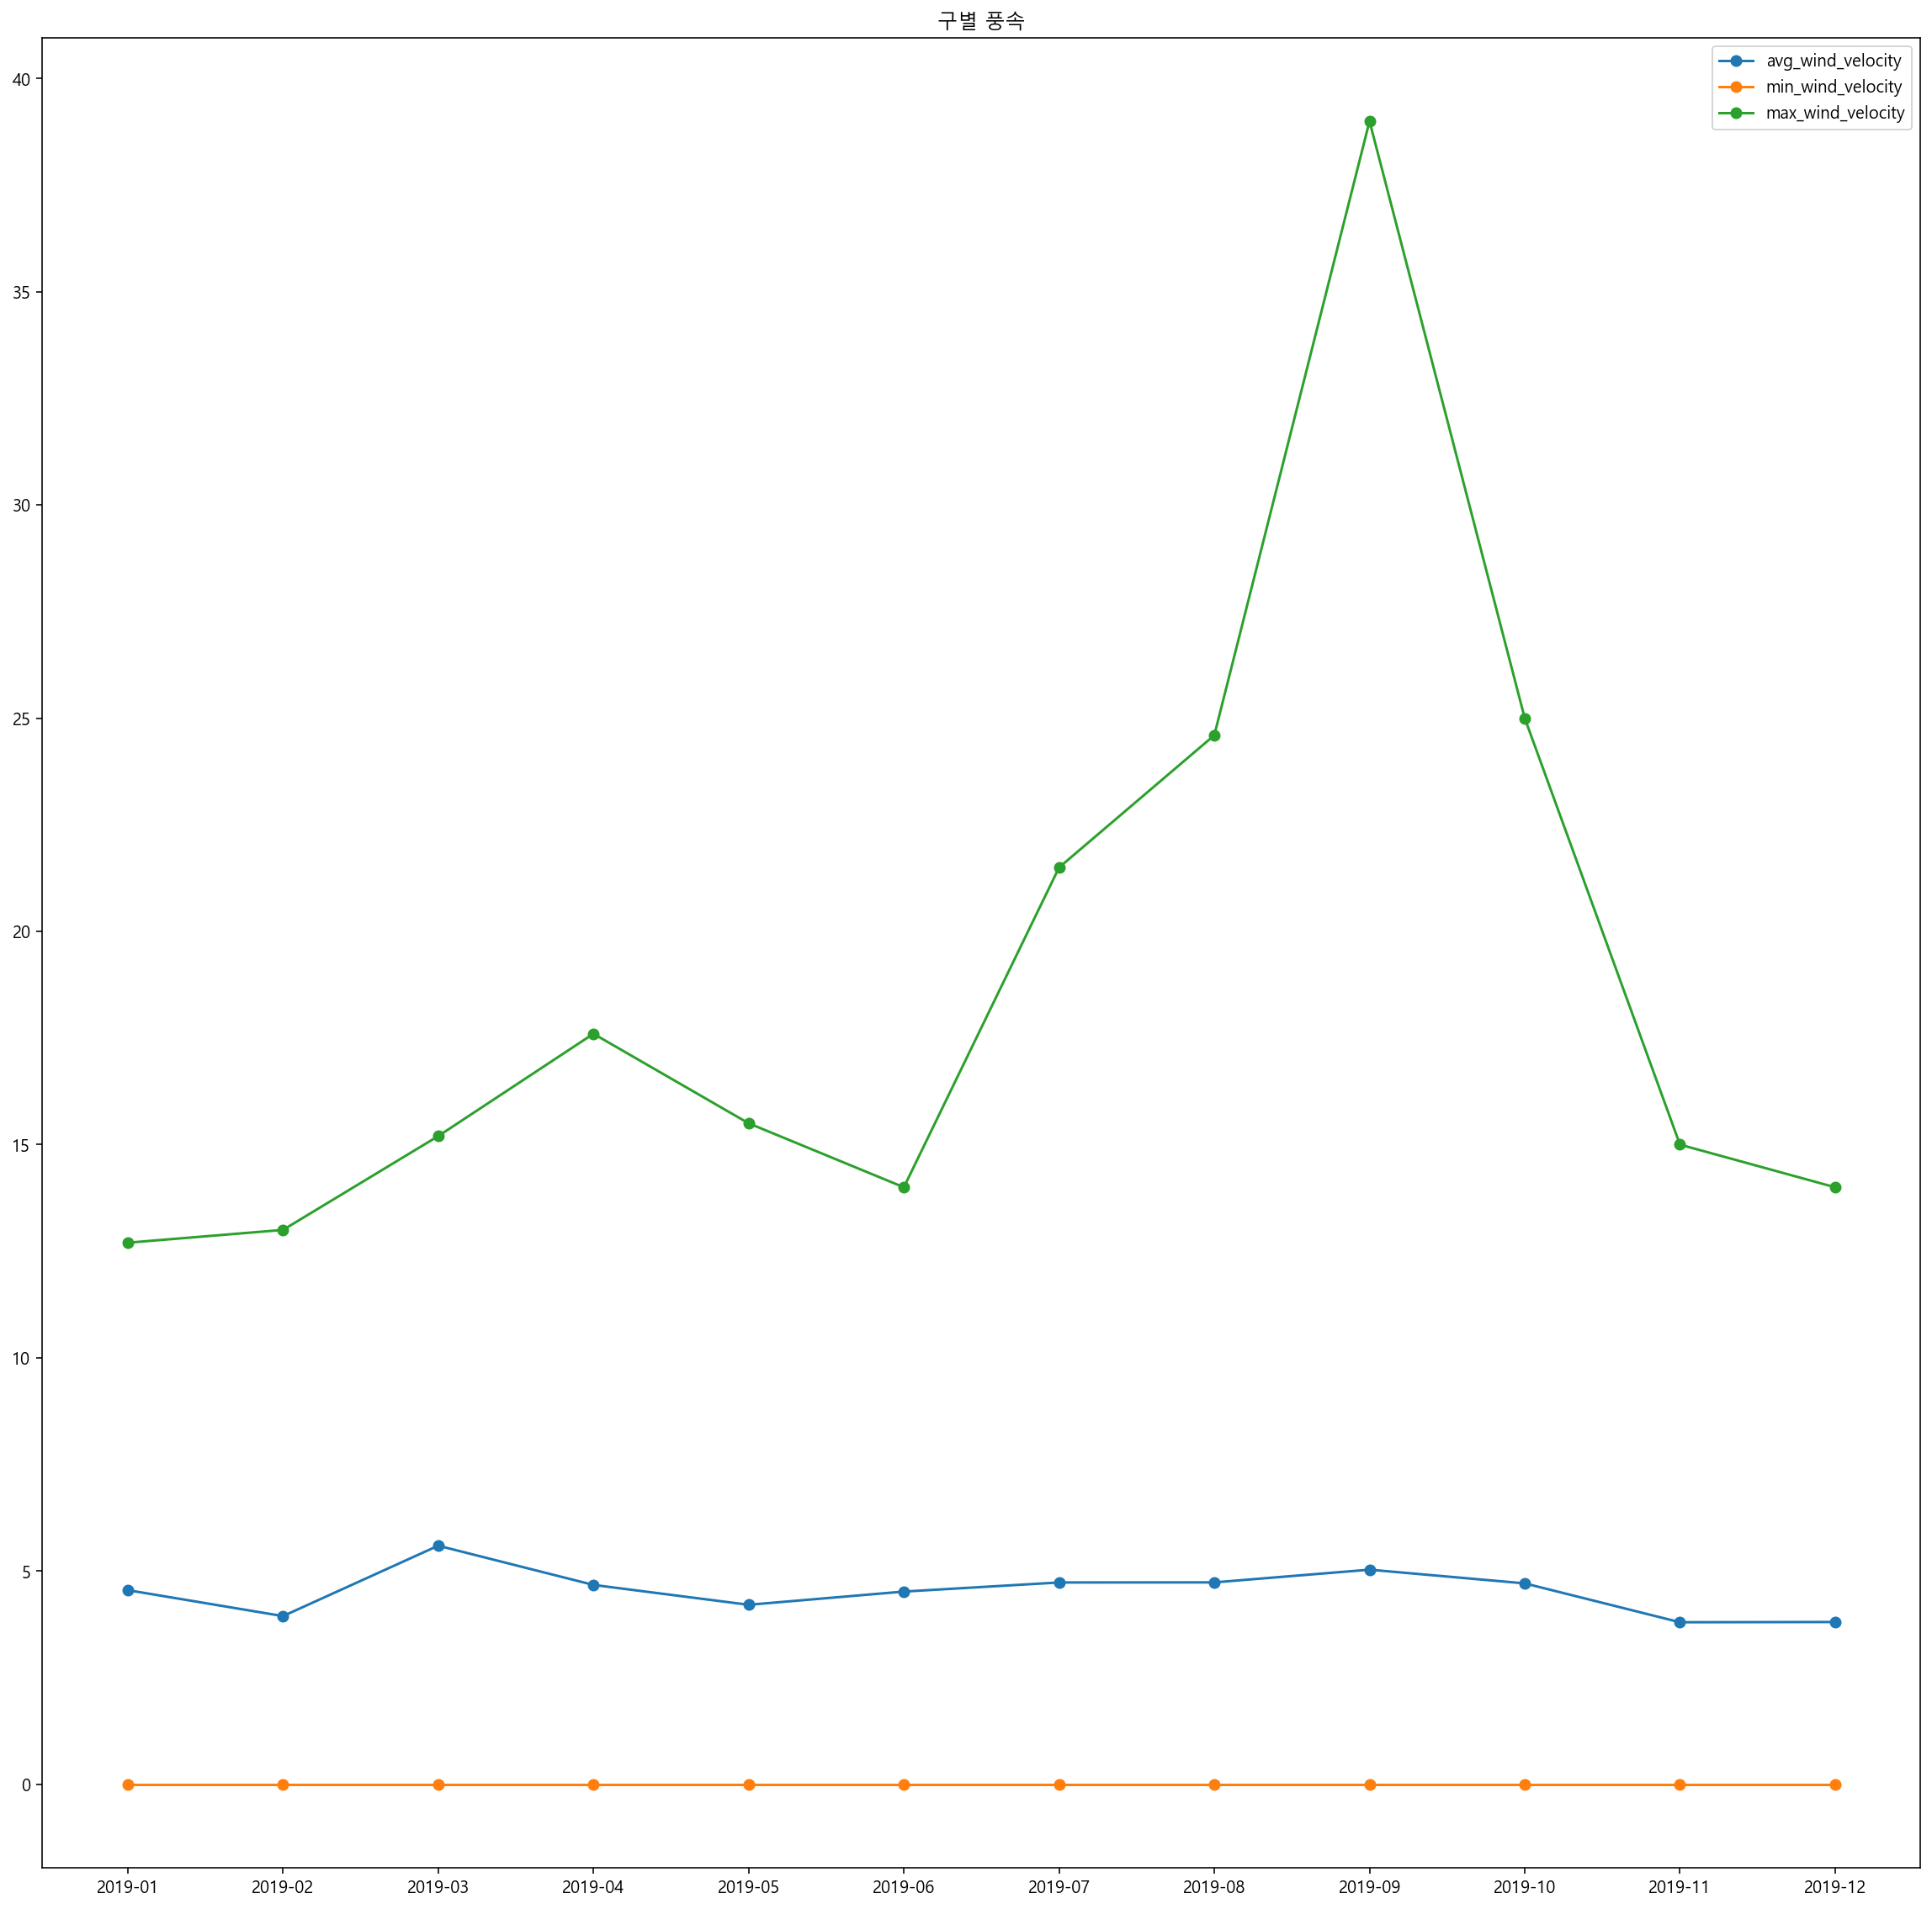

In [36]:
plt.figure(figsize=(20,20))
plt.title('구별 풍속')
plt.plot(month, avg_wind_velocity_m, marker='o', label='avg_wind_velocity')
plt.plot(month, min_wind_velocity_m, marker='o', label='min_wind_velocity')
plt.plot(month, max_wind_velocity_m, marker='o', label='max_wind_velocity')

plt.legend()
plt.show()

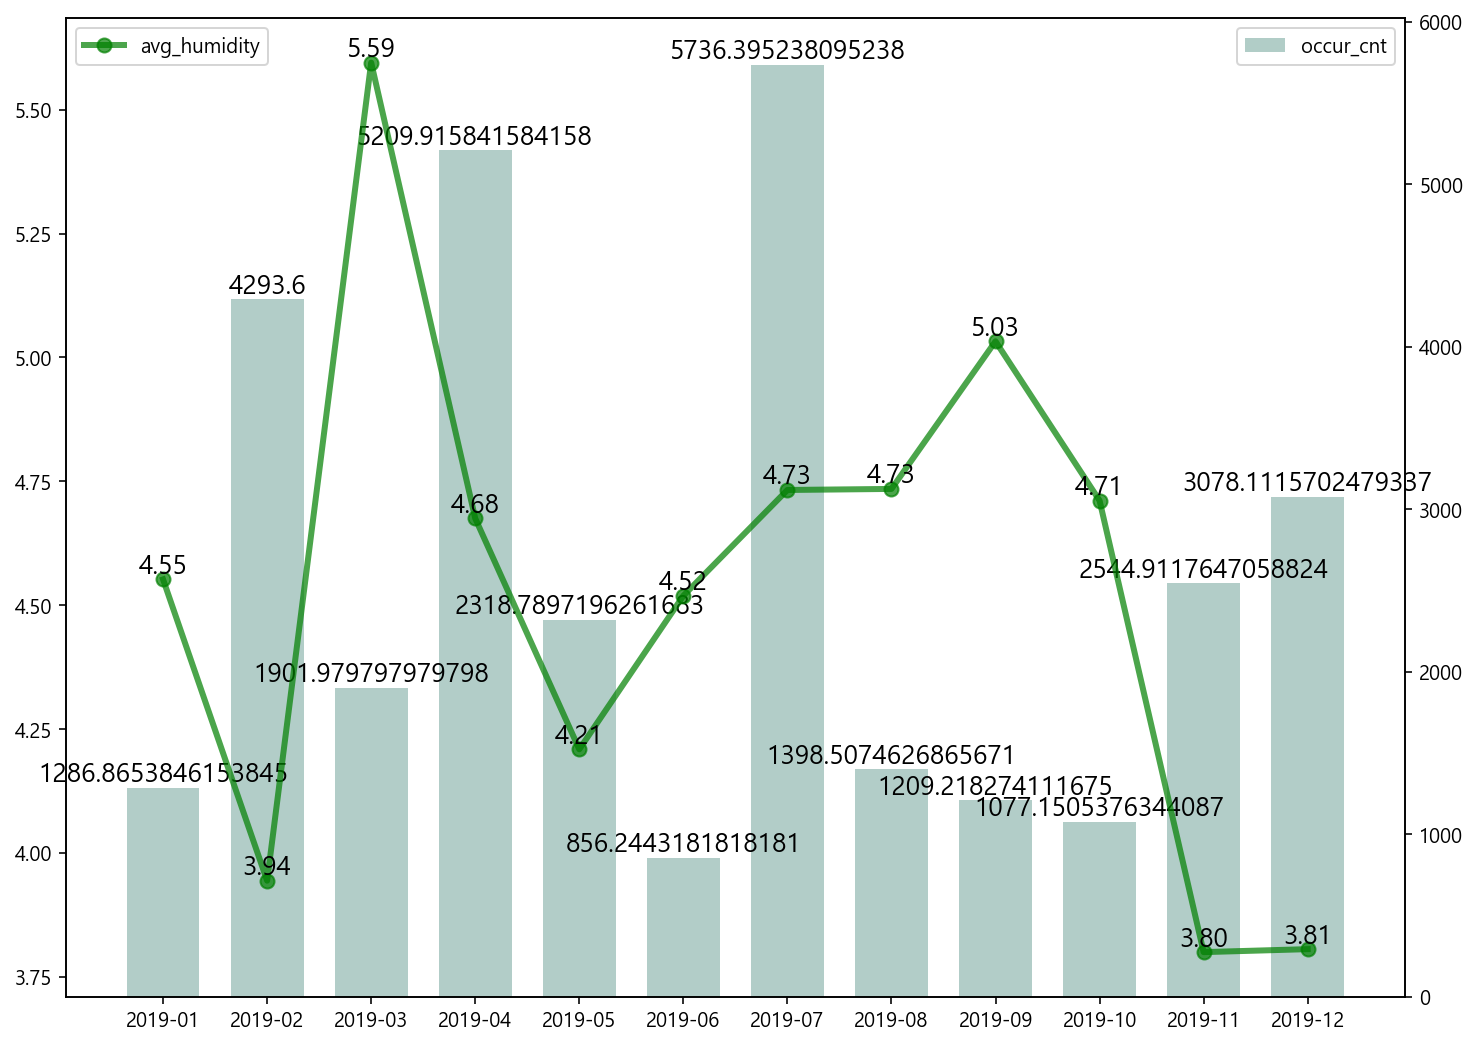

In [78]:
# 월별 화재건수당 피해규모 - 풍속
fig, ax1 = plt.subplots()
ax1.plot(month, avg_wind_velocity_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='avg_humidity', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_wind_velocity_m[i], str('%.2f'%float(avg_wind_velocity_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(month, per_case, color='#92b8b1', label='occur_cnt', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, per_case[i], str(per_case[i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
    
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [38]:
month_per_wind_velocity_list = [avg_wind_velocity_m, per_case]
wv_per_df = pd.DataFrame(month_per_wind_velocity_list).T
month_per_wind_velocity_corr = wv_per_df.corr(method='pearson')
print(month_per_wind_velocity_corr)

          0         1
0  1.000000 -0.224734
1 -0.224734  1.000000


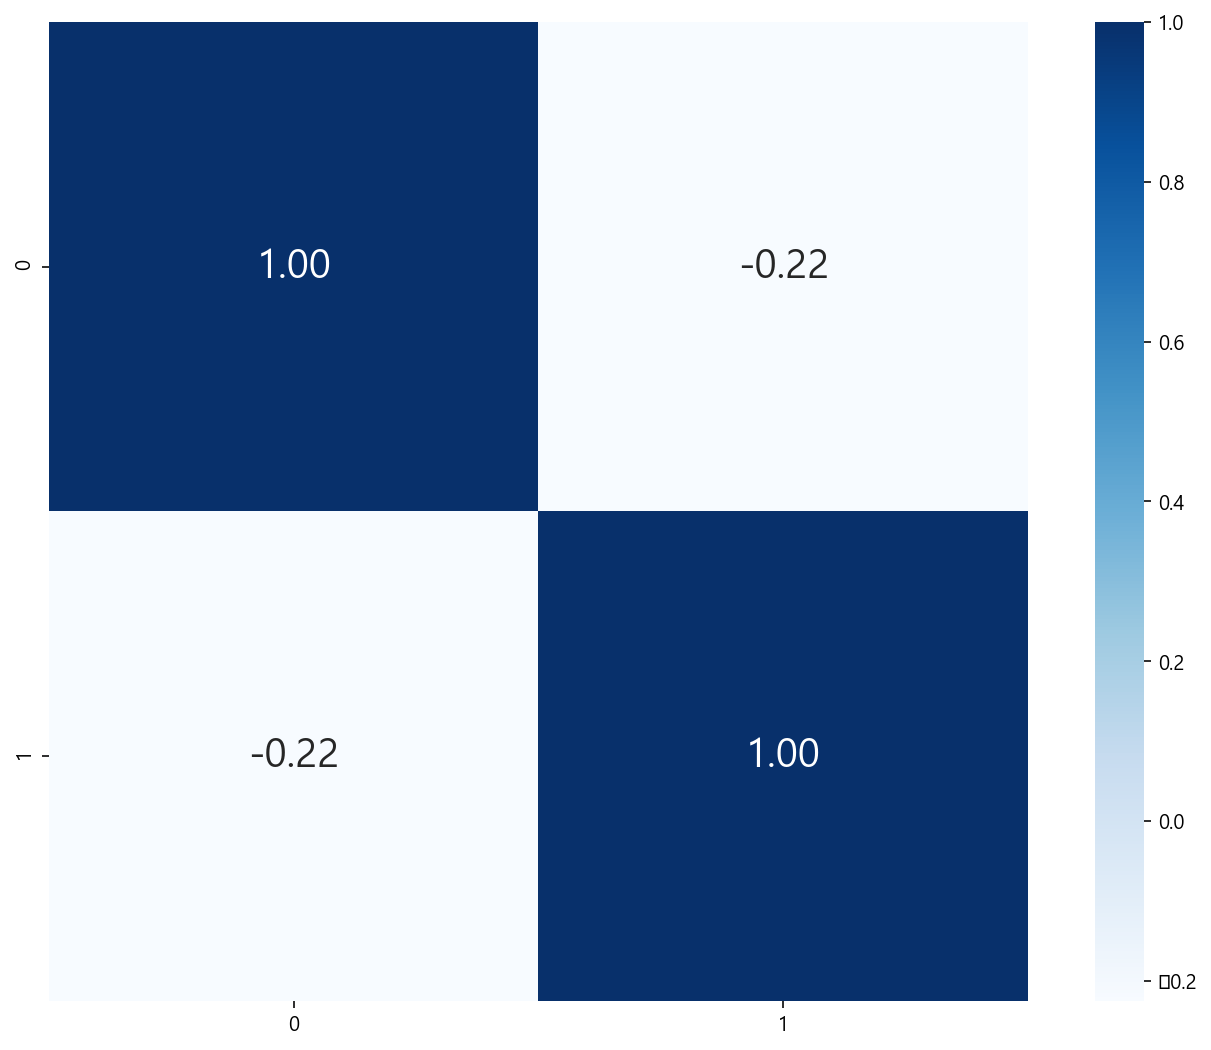

In [39]:
wv_df_heatmap = sns.heatmap(month_per_wind_velocity_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

In [87]:
wv_m_df = pd.DataFrame({
    'occur_cnt':monthsum,
    'damage_m':m_damagesum,
    'avg_wv_m': avg_wind_velocity_m
})

wv_df = pd.DataFrame({
    'occur_cnt':district_sum,
    'd_damage':d_damage_sum,
    'avg_wv':avg_wind_velocity
})

wv_df

,occur_cnt,d_damage,avg_wv
0,243,619501,3.639241
1,151,700612,2.672401
2,163,1293514,3.195139
3,162,237793,4.046386
4,150,162916,2.675426
5,121,500581,2.831192
6,190,522456,3.206986
7,226,630273,4.028128
8,76,60253,4.106474
9,94,179840,4.218856


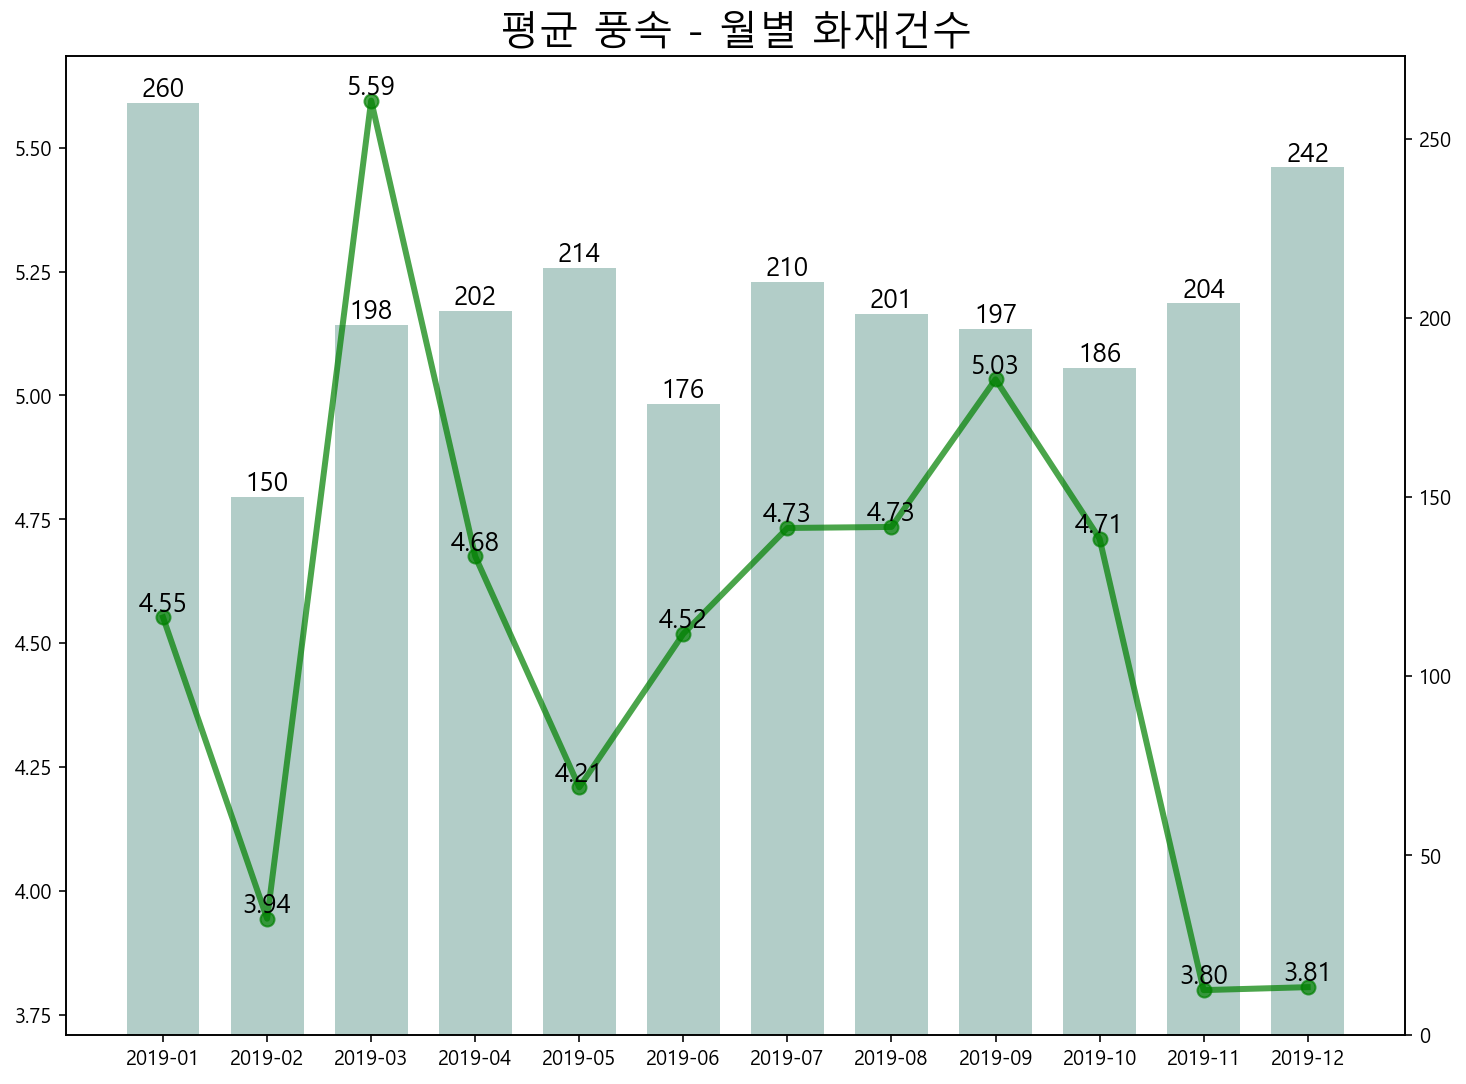

In [80]:
# 평균 풍속 - 월별 화재건수
fig, ax1 = plt.subplots()
ax1.plot(month, avg_wind_velocity_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균풍속', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_wind_velocity_m[i], str('%.2f'%float(avg_wind_velocity_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(month, month_df['occur_cnt'], color='#92b8b1', label='화재건수', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, month_df['occur_cnt'][i], str(month_df['occur_cnt'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 풍속 - 월별 화재건수', fontsize=20)
plt.show()

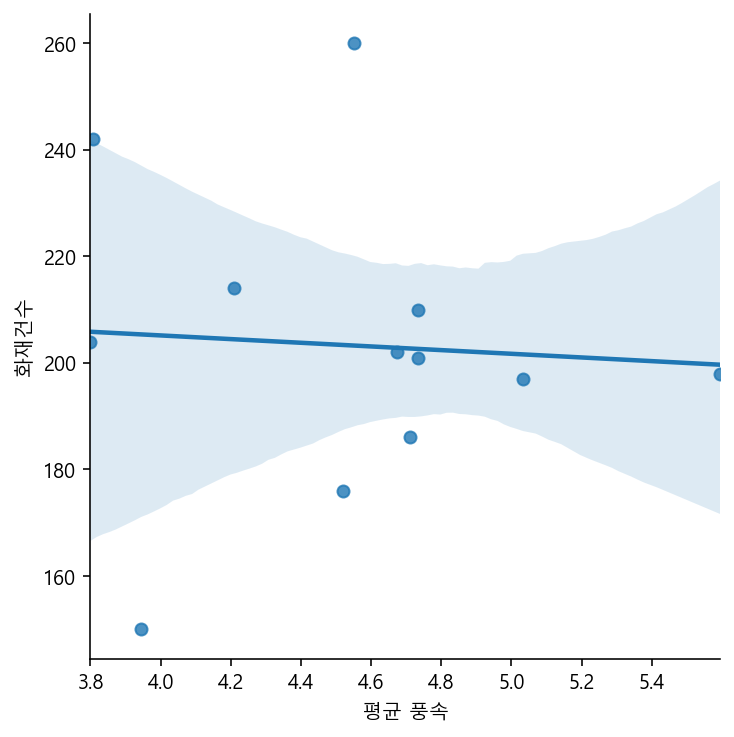

In [81]:
sns.lmplot(x='avg_wv_m', y='occur_cnt', data=wv_m_df).set(xlabel='평균 풍속', ylabel='화재건수').savefig('images/cor05.png')

In [82]:
month_wind_velocity_list = [avg_wind_velocity_m, monthsum]
wv_df = pd.DataFrame(month_wind_velocity_list).T
month_wind_velocity_corr = wv_df.corr(method='pearson')
print(month_wind_velocity_corr)

         0        1
0  1.00000 -0.06379
1 -0.06379  1.00000


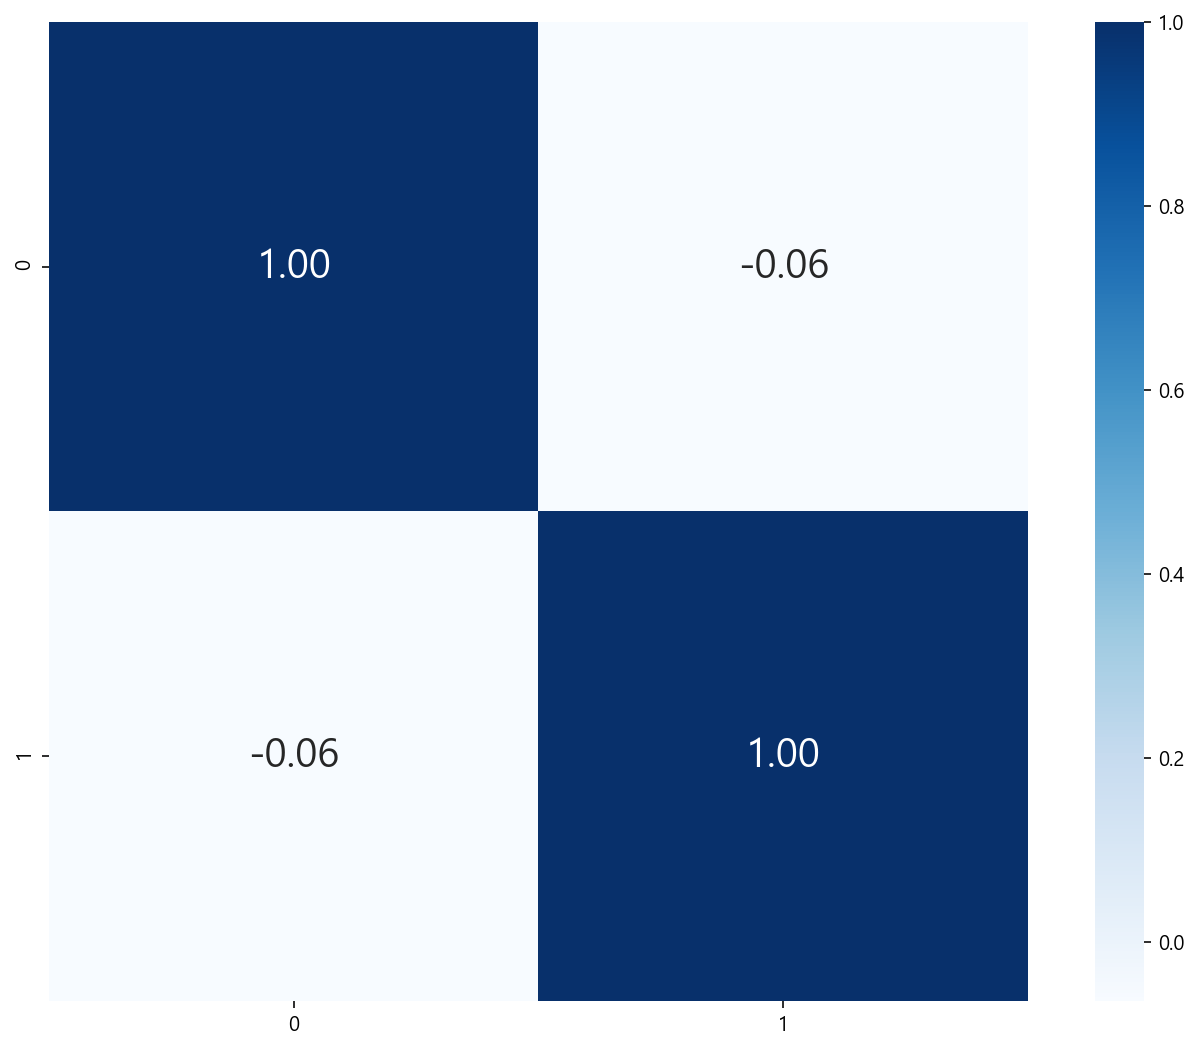

In [83]:
wv_df_heatmap = sns.heatmap(month_wind_velocity_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

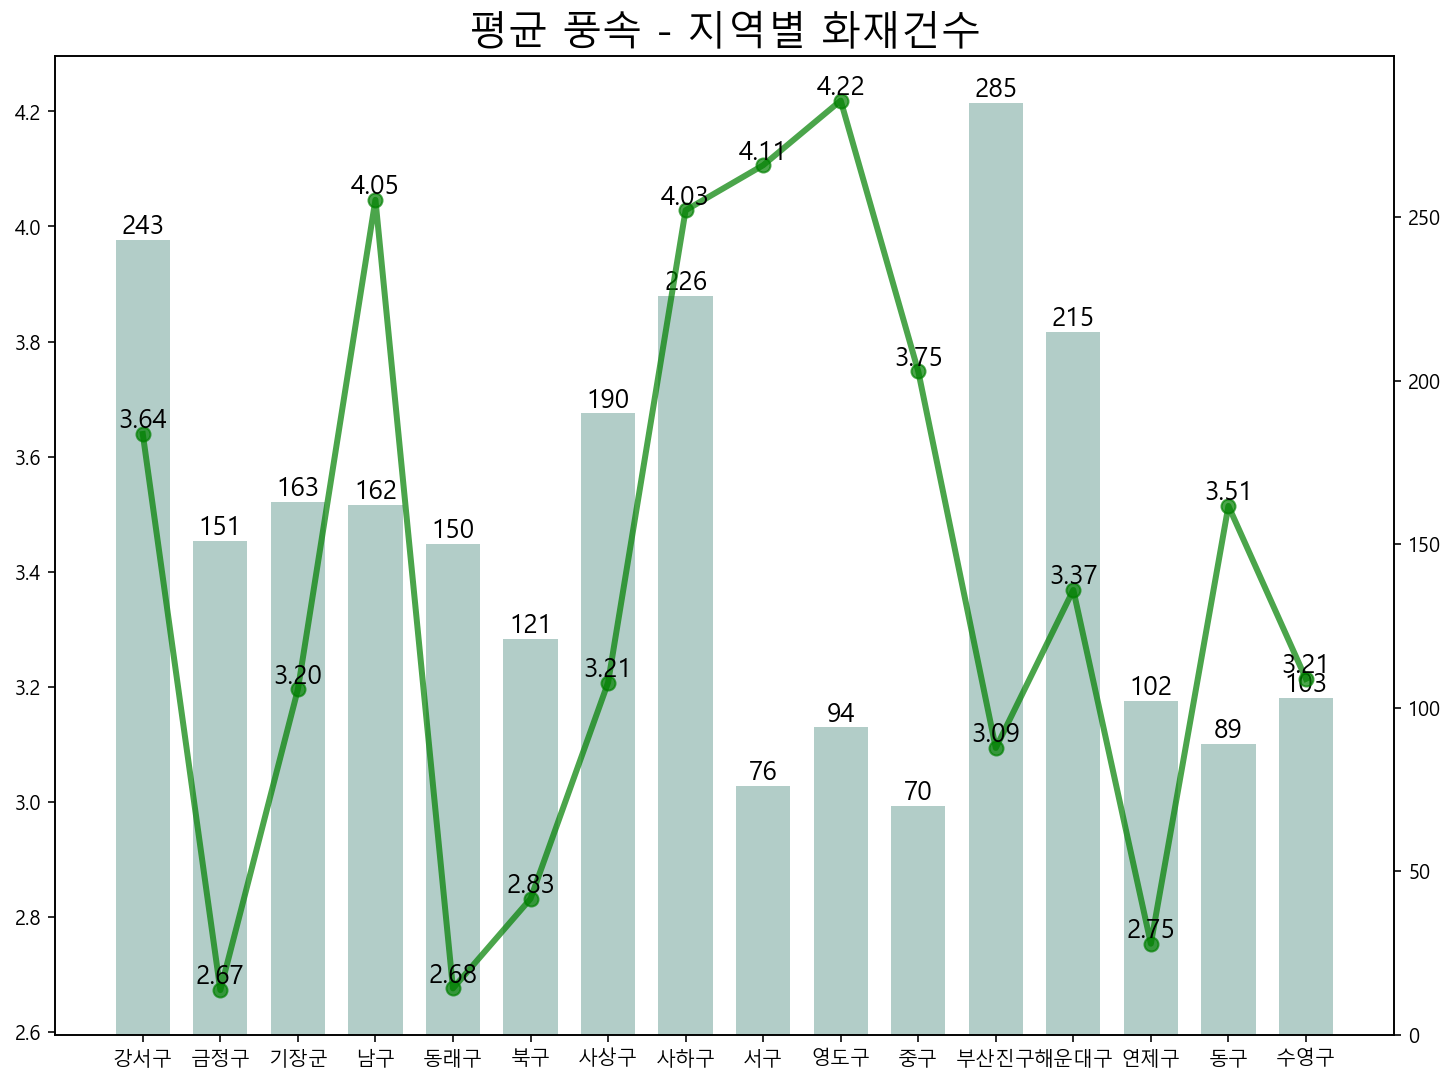

In [84]:
# 평균 풍속 - 지역별 화재건수
fig, ax1 = plt.subplots()
ax1.plot(district, avg_wind_velocity, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 풍속', marker='o')
for i, v in enumerate(district):
        plt.text(v, avg_wind_velocity[i], str('%.2f'%float(avg_wind_velocity[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, district_df['occur_cnt'], color='#92b8b1', label='화재건수', alpha=0.7, width=0.7)
for i, v in enumerate(district):
        plt.text(v, district_df['occur_cnt'][i], str(district_df['occur_cnt'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 풍속 - 지역별 화재건수', fontsize=20)
plt.show()

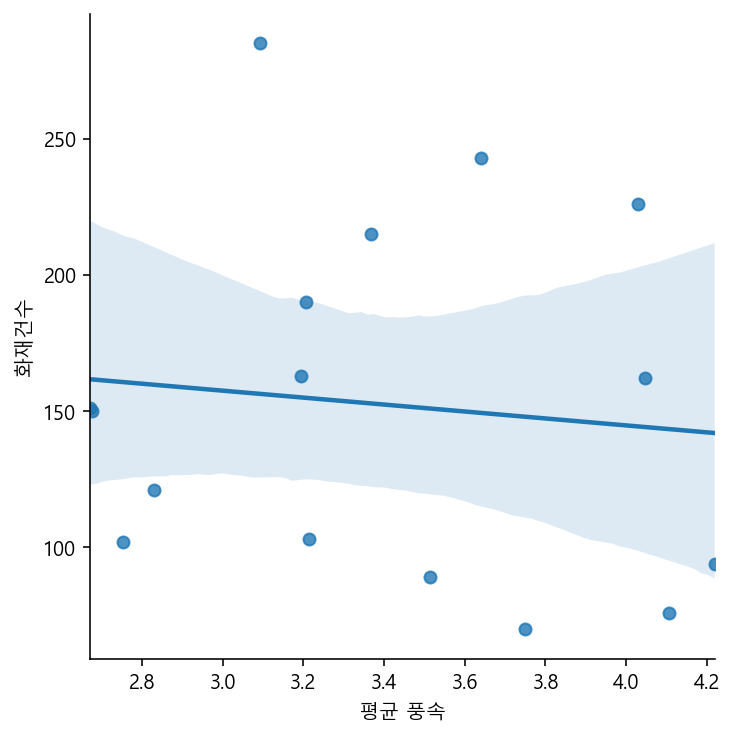

In [88]:
sns.lmplot(x='avg_wv', y='occur_cnt', data=wv_df).set(xlabel='평균 풍속', ylabel='화재건수').savefig('images/cor06.png')

In [89]:
district_wind_velocity_list = [avg_wind_velocity, district_sum]
wv2_df = pd.DataFrame(district_wind_velocity_list).T
district_wind_velocity_corr = wv2_df.corr(method='pearson')
print(district_wind_velocity_corr)

          0         1
0  1.000000 -0.104001
1 -0.104001  1.000000


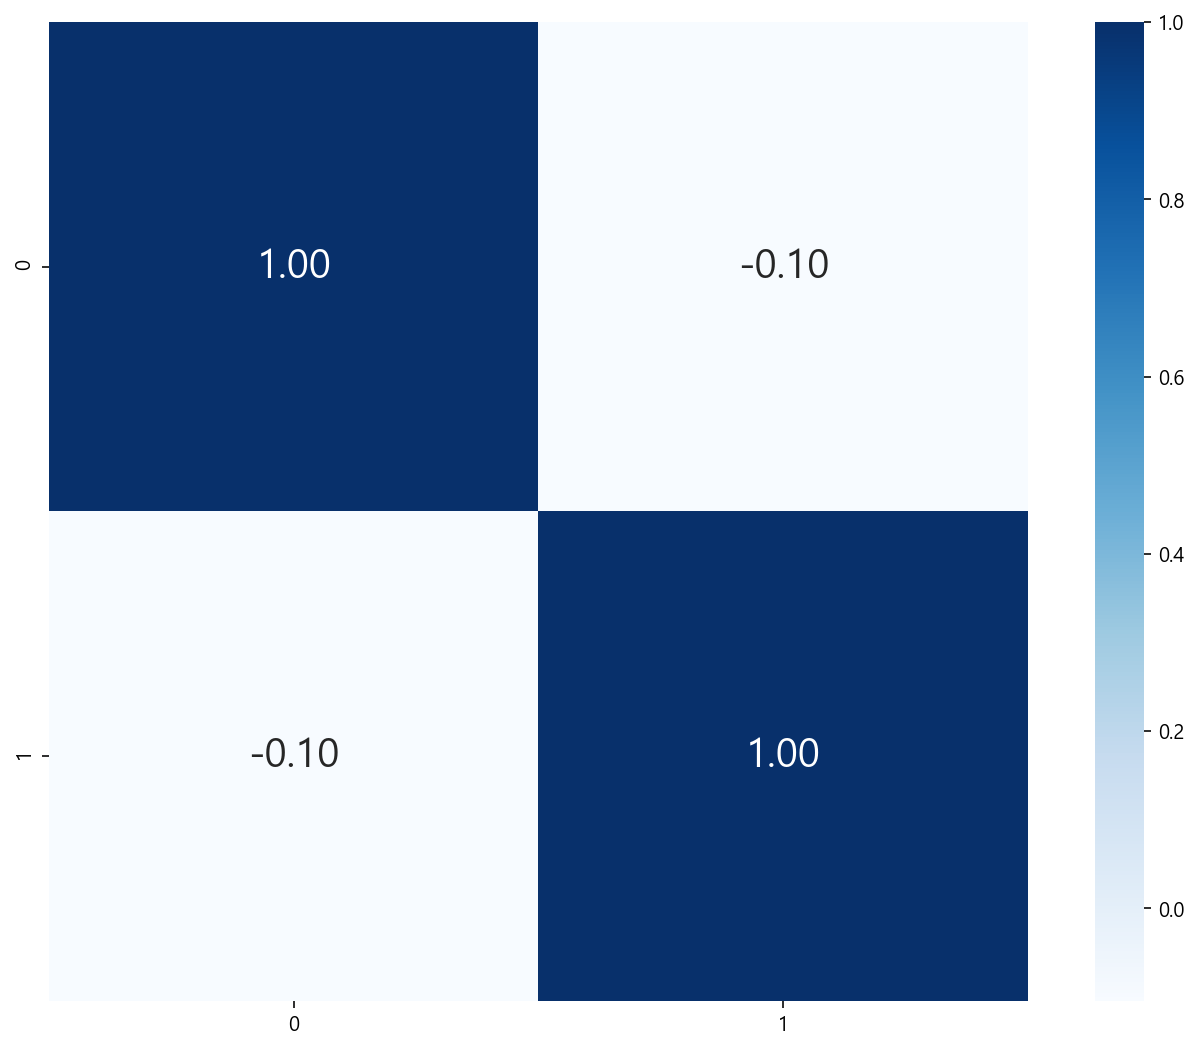

In [90]:
wv2_df_heatmap = sns.heatmap(district_wind_velocity_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

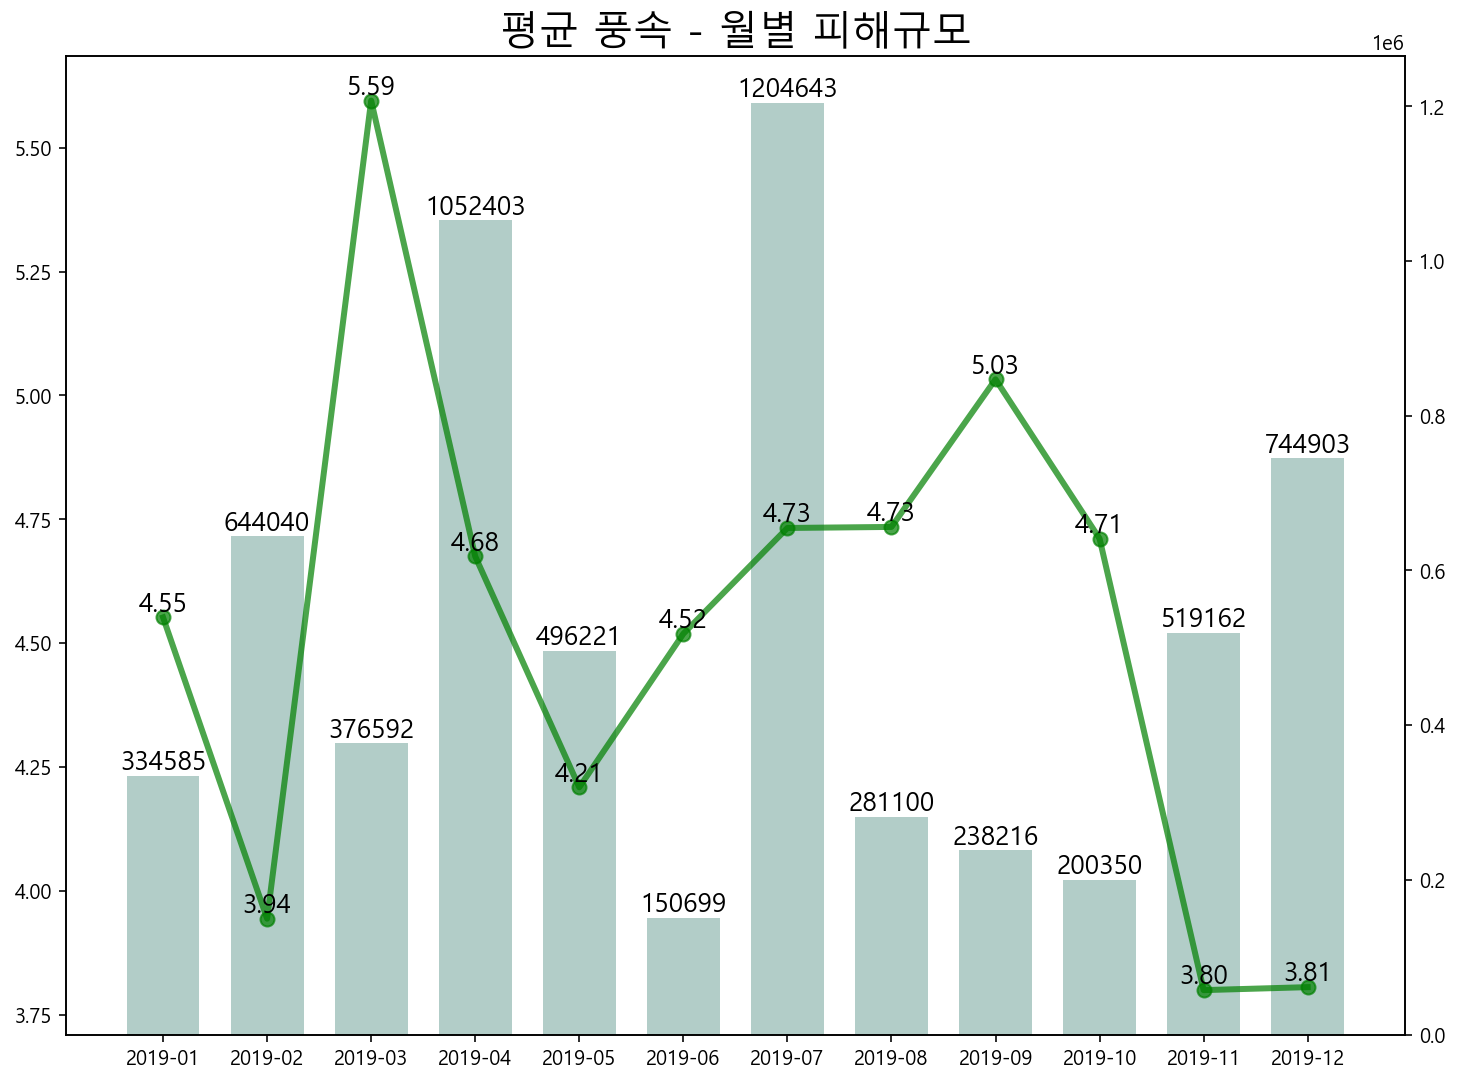

In [91]:
# 평균 풍속 - 월별 피해규모
fig, ax1 = plt.subplots()
ax1.plot(month, avg_wind_velocity_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 풍속', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_wind_velocity_m[i], str('%.2f'%float(avg_wind_velocity_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(month, month_damage_df['property_damage_sum_k'], color='#92b8b1', label='피해규모', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, month_damage_df['property_damage_sum_k'][i], str(month_damage_df['property_damage_sum_k'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 풍속 - 월별 피해규모', fontsize=20)
plt.show()

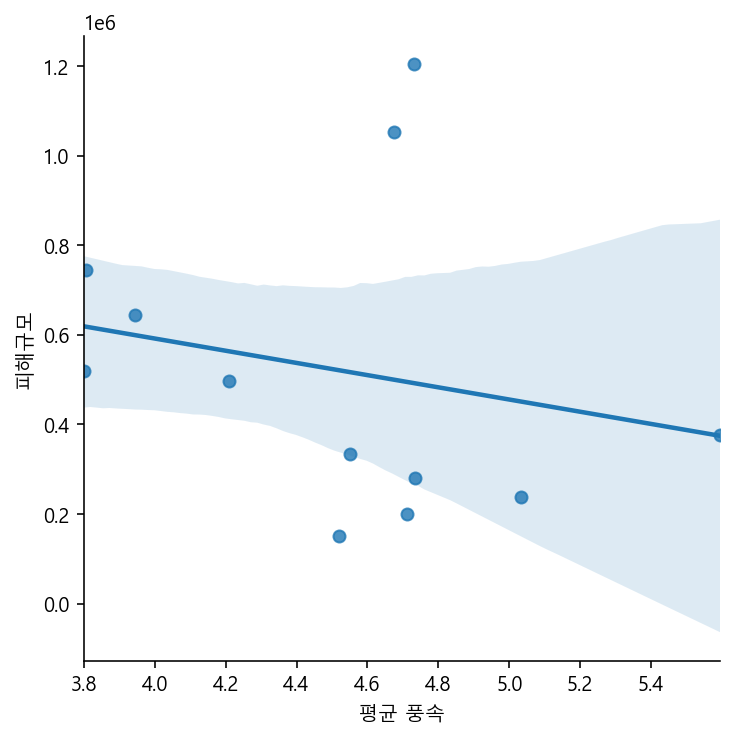

In [92]:
sns.lmplot(x='avg_wv_m', y='damage_m', data=wv_m_df).set(xlabel='평균 풍속', ylabel='피해규모').savefig('images/cor07.png')

In [93]:
md_wv_list = [avg_wind_velocity_m, m_damagesum]
wv3_df = pd.DataFrame(md_wv_list).T
md_wv_corr = wv3_df.corr(method='pearson')
print(md_wv_corr)

          0         1
0  1.000000 -0.212151
1 -0.212151  1.000000


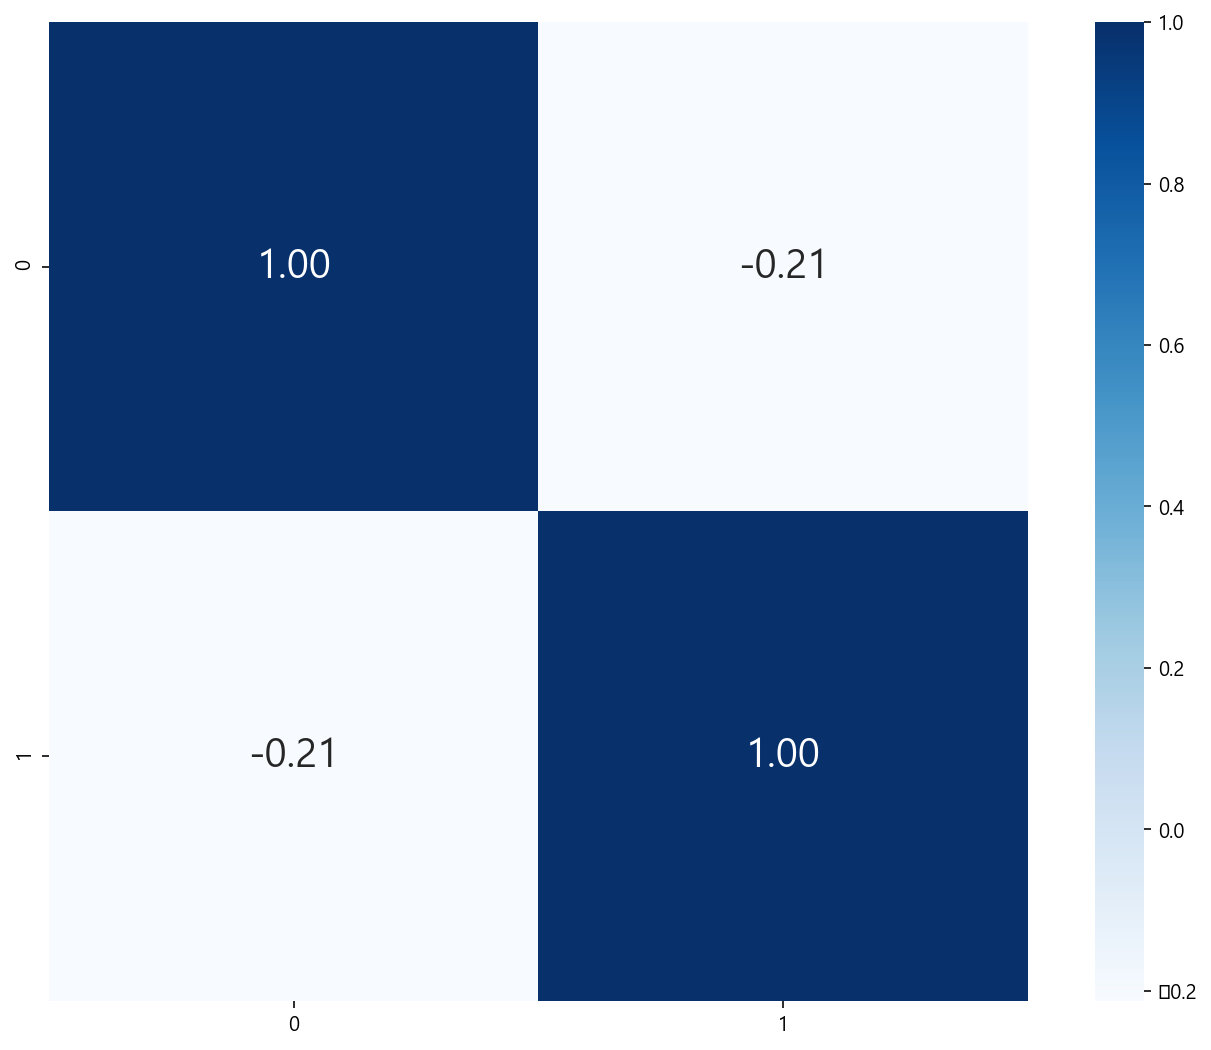

In [94]:
wv3_df_heatmap = sns.heatmap(md_wv_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

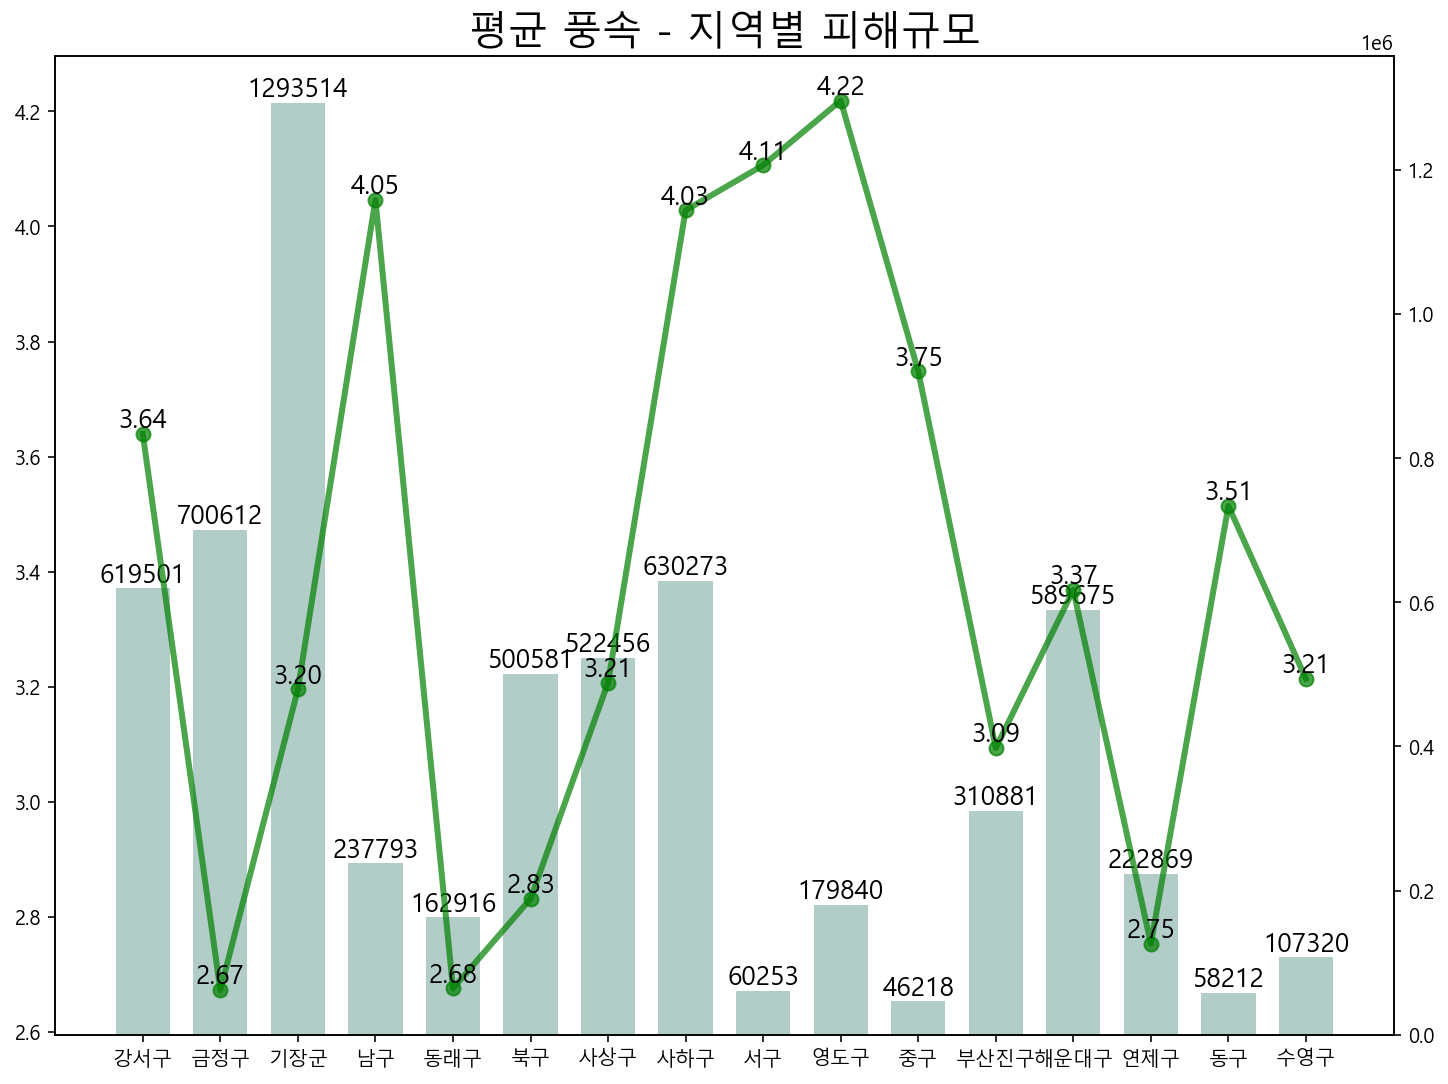

In [95]:
# 평균 풍속 - 지역별 피해규모
fig, ax1 = plt.subplots()
ax1.plot(district, avg_wind_velocity, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 풍속', marker='o')
for i, v in enumerate(district):
        plt.text(v, avg_wind_velocity[i], str('%.2f'%float(avg_wind_velocity[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, d_damage_df['district_property_damage_k'], color='#92b8b1', label='피해규모', alpha=0.7, width=0.7)
for i, v in enumerate(district):
        plt.text(v, d_damage_df['district_property_damage_k'][i], str(d_damage_df['district_property_damage_k'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 풍속 - 지역별 피해규모', fontsize=20)
plt.show()

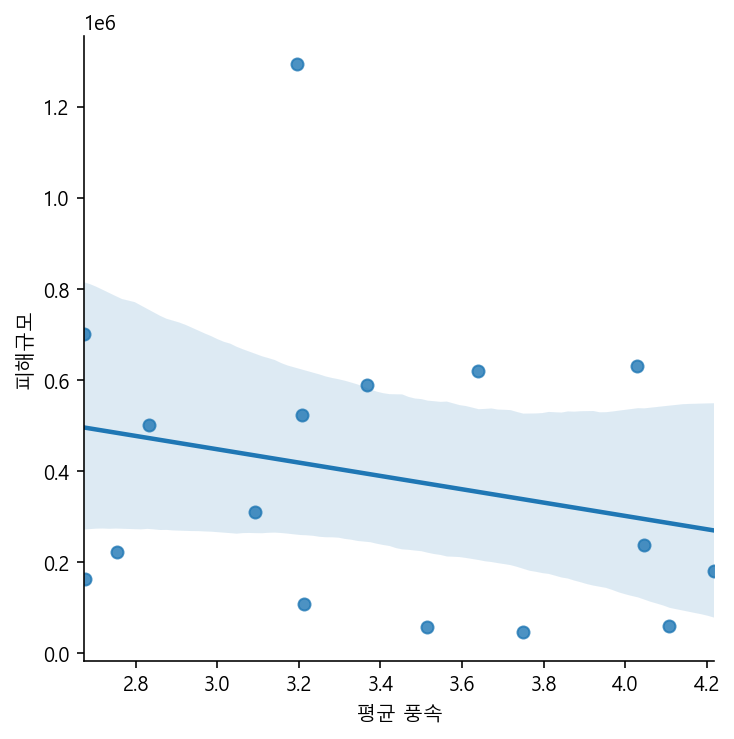

In [96]:
sns.lmplot(x='avg_wv', y='d_damage', data=wv_df).set(xlabel='평균 풍속', ylabel='피해규모').savefig('images/cor08.png')

In [97]:
dd_wv_list = [avg_wind_velocity, d_damage_sum]
wv4_df = pd.DataFrame(dd_wv_list).T
dd_wv_corr = wv4_df.corr(method='pearson')
print(dd_wv_corr)

         0        1
0  1.00000 -0.23199
1 -0.23199  1.00000


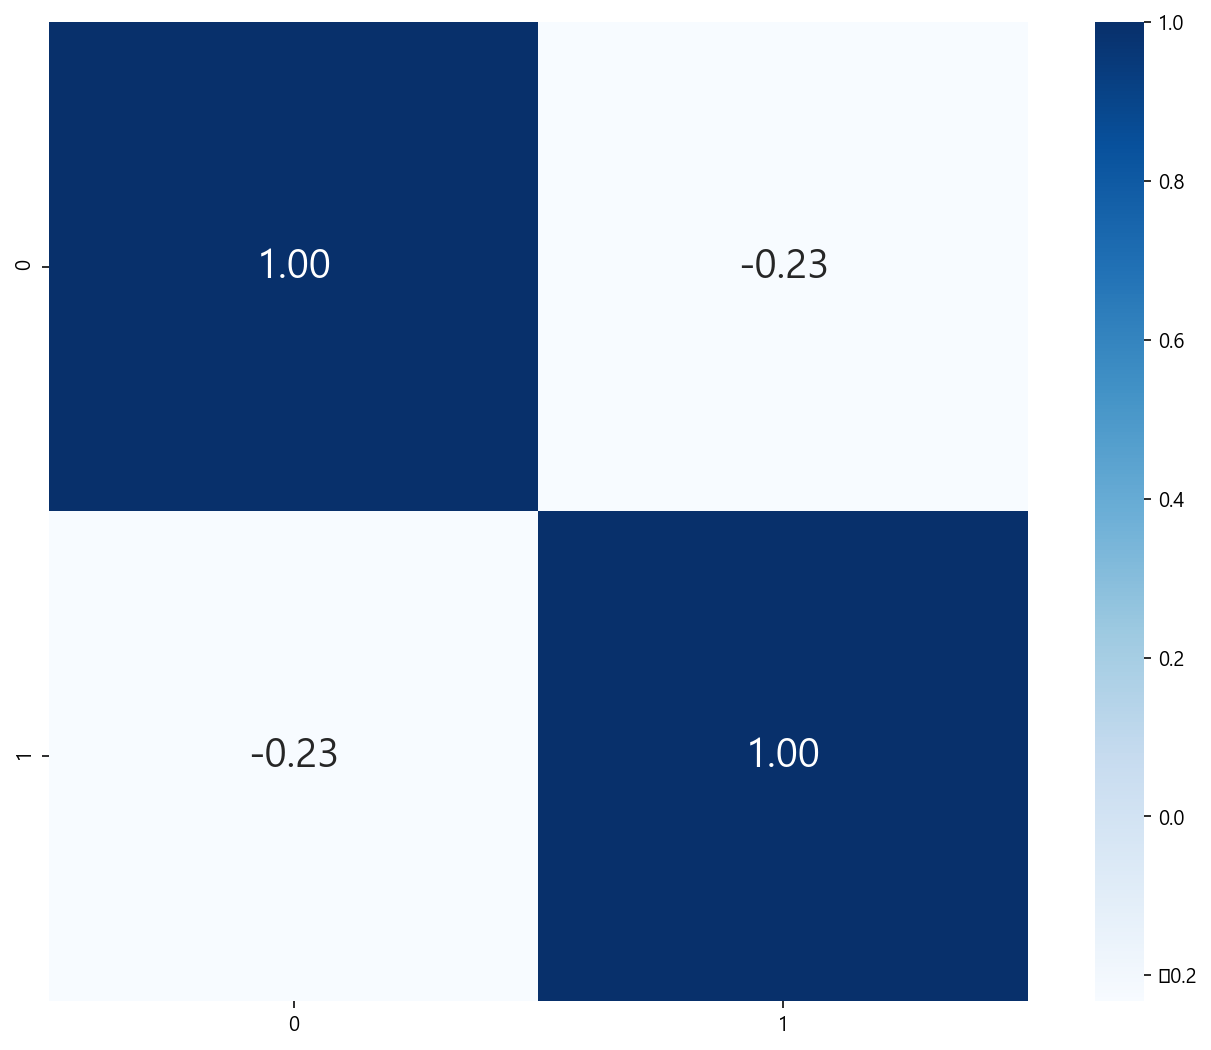

In [98]:
wv4_df_heatmap = sns.heatmap(dd_wv_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

## 기온 - 월별 화재건수, 피해규모 및 구별 화재건수, 피해규모

In [ ]:
temperature = pd.read_csv('data2/dw_temperature.csv', encoding='ansi')
temperature.head()

In [ ]:
# d_avg
avg_temperature = []
for i in range(len(district)):
    d = temperature[temperature.district == district[i]]   
    ds = d['avg_temperature'].sum()
    dss = ds / 12
    avg_temperature.append(dss)
    
# d_min
min_temperature = []
for i in range(len(district)):
    d = temperature[temperature.district == district[i]]
    ds = d['min_temperature'].min()
    min_temperature.append(ds)

# d_max
max_temperature = []
for i in range(len(district)):
    d = temperature[temperature.district == district[i]]
    ds = d['max_temperature'].max()
    max_temperature.append(ds)

    
    
# m_avg
avg_temperature_m = []
for i in range(len(month)):
    d = temperature[temperature.temperature_date == month[i]]   
    ds = d['avg_temperature'].sum()
    dss = ds / 12
    avg_temperature_m.append(dss)
    
# m_min
min_temperature_m = []
for i in range(len(month)):
    d = temperature[temperature.temperature_date == month[i]]
    ds = d['min_temperature'].min()
    min_temperature_m.append(ds)

# m_max
max_temperature_m = []
for i in range(len(month)):
    d = temperature[temperature.temperature_date == month[i]]
    ds = d['max_temperature'].max()
    max_temperature_m.append(ds)

In [ ]:
plt.figure(figsize=(20,10))
plt.title('월별 온도')
plt.plot(month, avg_temperature_m, marker='o', label='avg_temperature')
plt.plot(month, min_temperature_m, marker='o', label='min_temperature')
plt.plot(month, max_temperature_m, marker='o', label='max_temperature')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.title('구별 온도')
plt.plot(district, avg_temperature, marker='o', label='avg_temperature')
plt.plot(district, min_temperature, marker='o', label='min_temperature')
plt.plot(district, max_temperature, marker='o', label='max_temperature')

plt.legend()
plt.show()

In [ ]:
tm_df = pd.DataFrame({
    'occur_cnt':monthsum,
    'damage_m':m_damagesum,
    'avg_t':avg_temperature_m
})

t_df = pd.DataFrame({
    'occur_cnt':district_sum,
    'd_damage':d_damage_sum,
    'avg_t':avg_temperature
})

In [ ]:
# 평균 온도 - 월별 화재건수
fig, ax1 = plt.subplots()
ax1.plot(month, avg_temperature_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 온도', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_temperature_m[i], str('%.2f'%float(avg_temperature_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(month, month_df['occur_cnt'], color='#92b8b1', label='화재건수', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, month_df['occur_cnt'][i], str(month_df['occur_cnt'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 온도 - 월별 화재건수', fontsize=20)
plt.show()

In [ ]:
sns.lmplot(x='avg_t', y='occur_cnt', data=tm_df).set(xlabel='평균 온도', ylabel='화재건수').savefig('images/cor09.png')

In [ ]:
month_temperature_list = [avg_temperature_m, monthsum]
h_df = pd.DataFrame(month_temperature_list).T
month_temperature_corr=h_df.corr(method='pearson')
print(month_temperature_corr)

In [ ]:
h_df_heatmap = sns.heatmap(month_temperature_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

In [ ]:
# 평균 온도 - 월별 피해규모
fig, ax1 = plt.subplots()
ax1.plot(month, avg_temperature_m, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 온도', marker='o')
for i, v in enumerate(month):
        plt.text(v, avg_temperature_m[i], str('%.2f'%float(avg_temperature_m[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(month, month_damage_df['property_damage_sum_k'], color='#92b8b1', label='피해규모', alpha=0.7, width=0.7)
for i, v in enumerate(month):
        plt.text(v, month_damage_df['property_damage_sum_k'][i], str(month_damage_df['property_damage_sum_k'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 온도 - 월별 피해규모', fontsize=20)
plt.show()

In [ ]:
sns.lmplot(x='avg_t', y='damage_m', data=tm_df).set(xlabel='평균 온도', ylabel='피해규모').savefig('images/cor11.png')

In [ ]:
m_damage_list = [avg_temperature_m, m_damagesum]
h3_df = pd.DataFrame(m_damage_list).T
m_damage_corr = h3_df.corr(method='pearson')
print(m_damage_corr)

In [ ]:
h3_df_heatmap = sns.heatmap(m_damage_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

In [ ]:
# 평균 온도 - 지역별 화재건수
fig, ax1 = plt.subplots()
ax1.plot(district, avg_temperature, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 온도', marker='o')
for i, v in enumerate(district):
        plt.text(v, avg_temperature[i], str('%.2f'%float(avg_temperature[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, district_df['occur_cnt'], color='#92b8b1', label='화재건수', alpha=0.7, width=0.7)
for i, v in enumerate(district):
        plt.text(v, district_df['occur_cnt'][i], str(district_df['occur_cnt'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 온도 - 지역별 화재건수', fontsize=20)
plt.show()

In [ ]:
sns.lmplot(x='avg_t', y='occur_cnt', data=t_df).set(xlabel='평균 온도', ylabel='화재건수').savefig('images/cor10.png')

In [ ]:
district_temperature_list = [avg_temperature, district_sum]
h2_df = pd.DataFrame(district_temperature_list).T
district_temperature_corr = h2_df.corr(method='pearson')
print(district_temperature_corr)

In [ ]:
h2_df_heatmap = sns.heatmap(district_temperature_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')

In [ ]:
df = pd.DataFrame({
    'humidity_avg' : avg_humidity_m,
    'monthsum':monthsum
})

(df.humidity_avg - min(df.humidity_avg)).corr(df.monthsum)

In [ ]:
# 평균 온도 - 지역별 피해규모
fig, ax1 = plt.subplots()
ax1.plot(district, avg_temperature, color='green', markersize=7, linewidth=3, alpha=0.7, label='평균 온도', marker='o')
for i, v in enumerate(district):
        plt.text(v, avg_temperature[i], str('%.2f'%float(avg_temperature[i])),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax2 = ax1.twinx()
ax2.bar(district, d_damage_df['district_property_damage_k'], color='#92b8b1', label='피해규모', alpha=0.7, width=0.7)
for i, v in enumerate(district):
        plt.text(v, d_damage_df['district_property_damage_k'][i], str(d_damage_df['district_property_damage_k'][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title('평균 온도 - 지역별 피해규모', fontsize=20)
plt.show()

In [ ]:
sns.lmplot(x='avg_t', y='d_damage', data=t_df).set(xlabel='평균 온도', ylabel='피해규모').savefig('images/cor12.png')

In [ ]:
d_damage_list = [avg_temperature, d_damage_sum]
h4_df = pd.DataFrame(d_damage_list).T
d_damage_corr = h4_df.corr(method='pearson')
print(d_damage_corr)

In [ ]:
h4_df_heatmap = sns.heatmap(d_damage_corr,
                          cbar=True,
                          annot=True,
                          annot_kws={'size':20},
                          fmt='.2f',
                          square=True,
                          cmap='Blues')